# Estimating the daily bacterial release of fermentation products

In this notebook we present different caluclations to estimate the daily amount of fermentation products released by the human gut microbiota. The interactive figures integrate these calculations and allow an easier exploration of the parameters.


In [137]:
#needed packages
import numpy as np
import pandas as pd
import yieldfunctions as YF

#define function to go from carbon amount / feces amount to fermentation products and energy content of fermentation products

#acetate,propionate,succinate,lactate,butyrate,formate,ethanol 
#function to estimate carbohydrate amount which is available for bacteria to digest
#distinguish between fiber, sugar, and other carbohydrates and assume a certain passage rate for the other carbohydrates (rom the 'starches' consumed, 10% end up as starch in the LI)
def estimate_carbsforbacteria(total_carbon,fiber,sugar,fiberdigestion=0.75,starchpassage=0.15):
    return fiberdigestion*fiber+starchpassage*(total_carbon-fiber-sugar)
 

# British reference diet - estimation via fecal weight

In [135]:
#Fecal wet weight
M_feces_wet=117.72413793103448 #unit: g/day
#Fecal dry weight
#dry mass content
alpha_dw=29.58620689655172/117.72413793103448 #fraction
M_feces_dry=alpha_dw*M_feces_wet
#Bacterial dry weight
alpha_bact=0.546888888888889 #fraction
M_feces_bacteria=alpha_bact*M_feces_dry
#print(M_feces_bacteria)
caloutput=energycalc(M_feces_bacteria,scenario='reference',calctype='from_feces')
caloutputlabel=["Energy (kcal/d)", "FP (mmol/d)", "FP_sum (mmol/d)", "FP (g/d)", "FP_sum (g/d)", "FP (mmol C/d)","order FP"]
for l, c in zip(caloutputlabel, caloutput):
    print(l+": "+str(c))


double check enthalpies!!!
Energy (kcal/d): 128.2905200692255
FP (mmol/d): [136.33001901  16.17996331  49.75118462  29.87549586  88.38289686
  42.25996556  53.11414462]
FP_sum (mmol/d): 415.8936698369656
FP (g/d): [8.1868903  1.1985955  5.87511739 2.69118467 7.78741704 1.94522621
 2.44696864]
FP_sum (g/d): 30.13139976158275
FP (mmol C/d): 2408.6549845119844
order FP: ['acetate', 'propionate', 'succinate', 'lactate', 'butyrate', 'formate', 'ethanol']



# British reference diet - estimation via carbon load

In [103]:
M_carbs=44.6025 #unit: g/day
caloutput=energycalc(M_carbs,scenario='reference',calctype='from_carbs')
for l, c in zip(caloutputlabel, caloutput):
    print(l+": "+str(c))

double check enthalpies!!!
Energy (kcal/d): 144.19759919614293
FP (mmol/d): [153.23393676  18.18615953  55.9199649   33.57983719  99.34172479
  47.49988988  59.69990716]
FP_sum (mmol/d): 467.4614202125263
FP (g/d): [9.20200437 1.34721251 6.60358865 3.02487173 8.75299937 2.18641993
 2.75037472]
FP_sum (g/d): 33.86747129635903
FP (mmol C/d): 3042.996999712246
order FP: ['acetate', 'propionate', 'succinate', 'lactate', 'butyrate', 'formate', 'ethanol']


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.ticker import PercentFormatter
import scipy

capsize=6
#set colorscheme
colorNHANES='blue'
colorav='k'
colorrefdiet='purple'
colorHadza='green'
colorMouse='gray'
colorBK='#fb8072' #color for Burkitt data
colorBK2='gray' #color for Burkitt data
colorlistferm=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']

labelenergybac="energy supply via bacteria (kcal)"
labelenergybacfrac="enery supply via bacteria (%)"
labelenergybacfracnounit="energy supply via bacteria"

In [4]:
# plot different measurements fermentation products

# Fecal weight british diet
Analysis of fecal dry and wet weight data in Wyman et al and Stephen and Commungs.
The main conclusion of this data is: 
- average on both studies is 30g dry weight per day, and 118g wet weight per day.
- the fraction of bacteria is approx 54.7% (see next cell below). This corresponds to So 16.4 g bacterial dry mass. The average dry weight content is: 25%

We can provide an error for this dry mass by taking variation in fecal dry mass and error in fraction of bacteria. 
30 +-6g
54.7+- 5.1 %

fraction:
delta/mean = sqrt=(6/30)^2+(5.1/54.7)^2=0.22

This gives in total:
16.4+-3.6g

'relation between wet and dry weight (slope and offset)'

array([ 0.14669648, 12.31649029])

array([0.20674338, 5.60168328])

array([ 0.14771713, 10.60428369])

array([ 0.12564728, 15.11422806])


av and std wet weight (g/day)
117.72413793103448
38.07424376202291
av and std dry weight (g/day)
29.58620689655172
6.845624030794191
fraction of fecal wet weight ending up as dry weight*** to be used for Burit data
0.25131810193321613


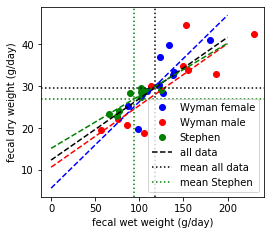

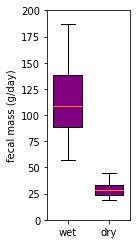

In [11]:
# look into fecal mass variation for British diet (data from Wyman et al and Stephen & Cummings)
BDdata=pd.read_excel('weightdistribution.xlsx',skiprows=1)
#display(BDdata)

########################################
#plot relation between wet and dry weight into one plot
#########################################

fig, axs = plt.subplots(1,1, figsize=(4,3.5))
axs=[axs]

axs[0].plot(BDdata['WET_WymanTable1'],BDdata['DRY_WymanTable1'],marker='o',ls='',c='b',label='Wyman female')
axs[0].plot(BDdata['WET_WymanTable3'],BDdata['DRY_WymanTable3'],marker='o',ls='',c='r',label='Wyman male')
axs[0].plot(BDdata['WET_Stephen'],BDdata['DRY_Stephen'],marker='o',ls='',c='g',label='Stephen')

#make linear fits
fitc1=np.polyfit(BDdata['WET_WymanTable1'],BDdata['DRY_WymanTable1'],1)
fitc2=np.polyfit(BDdata['WET_WymanTable3'],BDdata['DRY_WymanTable3'],1)
fitc3=np.polyfit(BDdata['WET_Stephen'][:-1],BDdata['DRY_Stephen'][:-1],1)

#put all points together
x=np.concatenate((BDdata['WET_WymanTable1'],BDdata['WET_WymanTable3'],BDdata['WET_Stephen'][:-1]),axis=0)


BD_bacwetweight=x.mean()


y=np.concatenate((BDdata['DRY_WymanTable1'],BDdata['DRY_WymanTable3'],BDdata['DRY_Stephen'][:-1]),axis=0)

#linear fit of all points
fitc=np.polyfit(x,y,1)
xlin=np.linspace(0,200,10)

#plot ifts
axs[0].plot(xlin,xlin*fitc[0]+fitc[1],ls='--',c='k',label='all data')
axs[0].plot(xlin,xlin*fitc1[0]+fitc1[1],ls='--',c='b')
axs[0].plot(xlin,xlin*fitc2[0]+fitc2[1],ls='--',c='r')
axs[0].plot(xlin,xlin*fitc3[0]+fitc3[1],ls='--',c='g')

#plot relation
display("relation between wet and dry weight (slope and offset)")
display(fitc)
display(fitc1)
display(fitc2)
display(fitc3)

axs[0].set_xlabel('fecal wet weight (g/day)')
axs[0].set_ylabel('fecal dry weight (g/day)')

#plot averages into plot as well
axs[0].axvline(x.mean(),c='k',ls=":",label='mean all data')
axs[0].axhline(y.mean(),c='k',ls=':')
axs[0].axvline(BDdata['WET_Stephen'][:-1].mean(),ls=':',c='g',label='mean Stephen')
axs[0].axhline(BDdata['DRY_Stephen'][:-1].mean(),ls=':',c='g')
axs[0].legend()

print()
print('av and std wet weight (g/day)')
print(x.mean())
print(x.std())
print("av and std dry weight (g/day)")
print(y.mean())
print(y.std())

BD_fecaldrymass=y.mean()
BD_fecaldrymassstd=y.std()
print('fraction of fecal wet weight ending up as dry weight*** to be used for Burit data')
print(y.mean()/x.mean())



############
# plot box plots with distribution of wet and dry weight
###########
fig, axs = plt.subplots(1,1, figsize=(2,3.5))
axs=[axs]

databox=[x,y]
bplot1=axs[0].boxplot(databox,labels=["wet","dry"],vert=True,showfliers=True, widths=[0.7]*2,patch_artist=True)#,"Mice (autoclaved lab coy)"])

colors=[colorrefdiet]*2
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)


axs[0].set_ylabel('fecal mass (g/day)')
axs[0].set_ylim(0,200)
fig.tight_layout()
fig.savefig("plot_output/BRITISH_fecal.pdf")






### A more detailed analysis of water content in feces


,source,n,fec_wet,fec_wet_var,fec_dry,fec_dry_var,water,pairing,var_type
0,"Stephen and Cummings, Nature 1980",6,95.5,8.7,27.0,1.2,71.727749,1.0,SEM
1,"Stephen and Cummings, Nature 1980",6,197.0,13.4,46.0,1.1,76.649746,1.0,SEM


['Stephen and Cummings, Nature 1980' 'Prynne and Southgate, 1979'
 'Cummings, Hill, Jivraj et al, 1979' 'Cummings, Hill, Jenkins, 1976'
 'Walters et al, 1975' 'Stephen and Cummings, J Med Microbiol 1980'
 'Wyman et al, 1978' 'Stephen et al, 1986']
['Stephen and Cummings, Nature 1980' 'Prynne and Southgate, 1979'
 'Cummings, Hill, Jivraj et al, 1979' 'Cummings, Hill, Jenkins, 1976'
 'Walters et al, 1975' 'Stephen and Cummings, J Med Microbiol 1980'
 'Wyman et al, 1978' 'Stephen et al, 1986']
funct parwater lin
[4.63384822e-04 6.85305059e-01]
funct parwater 2
[0.60405545 0.01262674]
funct parwater 3
[ 0.49246011  0.03076236 -0.00070195]
pearson coefficient - with Wyman data
[[1.         0.69976807]
 [0.69976807 1.        ]]
funct parwater 4
[ 0.1631733  10.31323172]
funct parwater 2 _noWyman
[0.60157533 0.01252741]
funct parwater 3 _noWyman
[ 0.49123749  0.03019306 -0.00066813]
funct parwater 4 noWhyman
[ 0.15933972 11.06740448]
pearson coefficient - without Wyman data
[[1.         0.792

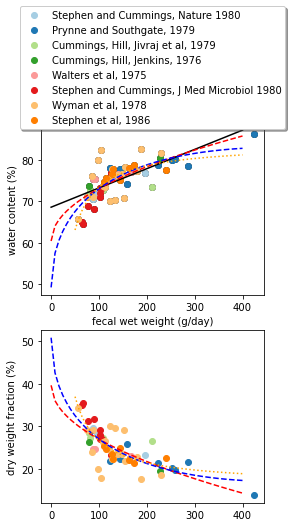

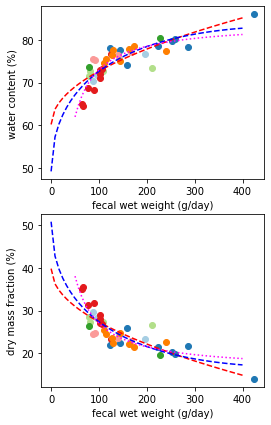

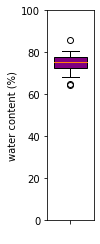

In [12]:
watercontent=pd.read_csv("watercontent.csv")
display(watercontent.head(2))

fig, axs = plt.subplots(2,1, figsize=(4,2*3.5))
#axs=[axs]

axs[0].set_xlabel('fecal wet weight (g/day)')
axs[0].set_ylabel('water content (%)')
axs[1].set_ylabel('dry weight fraction (%)')


axs[0].plot(watercontent['fec_wet'],watercontent['water'],marker='o',color='k',ls='')
colorl3=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

studylist=watercontent.source.unique()
print(studylist)
ilc=-1
for il in studylist:
    ilc=ilc+1
    sel=watercontent.loc[watercontent['source'] ==il]
    axs[0].plot(sel['fec_wet'],sel['water'],marker='o',color=colorl3[ilc],ls='',label=il)
    axs[1].plot(sel['fec_wet'],100.-sel['water'],marker='o',color=colorl3[ilc],ls='',label=il)


    
print(studylist)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.7),
          ncol=1, fancybox=True, shadow=True)


x=watercontent['fec_wet']
y=watercontent['water']/100.
#linear fit
fit=np.polyfit(x,y,1)
linfit_water_par=fit
print("funct parwater lin")
print(linfit_water_par)
xr=np.linspace(0,400)
xr2=np.linspace(50,400)
axs[0].plot(xr,100*(xr*fit[0]+fit[1]),color='k')
#curve fit




#fit non-linear function to data
def func2_waterc(x, a, b):
  return a +b*np.sqrt(x)
  #return a * np.log(b * x) + c
from scipy.optimize import curve_fit

popt, pcov = curve_fit(func2_waterc, x, y)
func2_water_par=popt
print("funct parwater 2")
print(func2_water_par)
#popt, pcov = curve_fit(func2, xc, yc,p0,method='trf')
axs[0].plot(xr, 100*func2_waterc(xr, *func2_water_par), color='r',ls='--', label="sqrt ffit")
axs[1].plot(xr, 100.-100*func2_waterc(xr, *func2_water_par), color='r',ls='--', label="sqrt ffit")


#axs[4].legend()

#fit non-linear function to data
def func3_waterc(x, a, b, c):
  return a +b*np.sqrt(x)+c*x
  #return a * np.log(b * x) + c
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func3_waterc, x, y)
#popt, pcov = curve_fit(func2, xc, yc,p0,method='trf')
func3_water_par=popt
print("funct parwater 3")
print(func3_water_par)
axs[0].plot(xr, 100*func3_waterc(xr, *func3_water_par), color='b',ls='--', label="sqrt fit")
axs[1].plot(xr, 100-100*func3_waterc(xr, *func3_water_par), color='b',ls='--', label="sqrt fit")

#to check if defined function works
#axs[0].plot(xr2,100-100*dryweight_fromwetweight(xr2,calculationmode=4,fraction=True),color='gray')
#axs[0].plot(xr2,100-100*dryweight_fromwetweight(xr2,calculationmode=3,fraction=True),color='orange')
#axs[4].legend()

####calculate pearson coefficient
pearsonc=np.corrcoef(x,y)
print('pearson coefficient - with Wyman data')
print(pearsonc)


#fit non-linear function to data
def func4_waterc(x, a, b):
  return 1-(a+b/x)
  #return a * np.log(b * x) + c
popt, pcov = curve_fit(func4_waterc, x, y)
func4_water_par=popt
print("funct parwater 4")
print(func4_water_par)
axs[0].plot(xr2, 100*func4_waterc(xr2, *func4_water_par), color='orange',ls=':', label="1/x fit")
axs[1].plot(xr2, 100-100*func4_waterc(xr2, *func4_water_par), color='orange',ls=':', label="1/x fit")

#fig.tight_layout()
fig.savefig("plot_output/BRITISH_watercontent.pdf")


#################
#plot without Wyman data
########################



x=watercontent.loc[watercontent['source'] != 'Wyman et al, 1978']['fec_wet']
y=watercontent.loc[watercontent['source'] != 'Wyman et al, 1978']['water']/100.

fig, axs = plt.subplots(2,1, figsize=(4,2*3.5))
#axs=[axs]
#plot without Wyman et al, 1978' data
#

ilc=-1
for il in studylist:
    ilc=ilc+1
    if il=='Wyman et al, 1978':
        pass
    else:
        sel=watercontent.loc[watercontent['source'] ==il]
        axs[0].plot(sel['fec_wet'],sel['water'],marker='o',color=colorl3[ilc],ls='',label=il)
        axs[1].plot(sel['fec_wet'],100.-sel['water'],marker='o',color=colorl3[ilc],ls='',label=il)

#axs[0].plot(watercontent['fec_wet'],watercontent['water'],marker='o',color='k',ls='')


axs[0].set_xlabel('fecal wet weight (g/day)')
axs[0].set_ylabel('water content (%)')

#add fit

popt, pcov = curve_fit(func2_waterc, x, y)
func2_water_par_noWyman=popt
print("funct parwater 2 _noWyman")
print(func2_water_par_noWyman)
#popt, pcov = curve_fit(func2, xc, yc,p0,method='trf')
axs[0].plot(xr, 100*func2_waterc(xr, *func2_water_par_noWyman), color='r',ls='--', label="sqrt ffit")
axs[1].plot(xr, 100-100*func2_waterc(xr, *func2_water_par_noWyman), color='r',ls='--', label="sqrt ffit")


#axs[4].legend()

#fit non-linear function to data
popt, pcov = curve_fit(func3_waterc, x, y)
#popt, pcov = curve_fit(func2, xc, yc,p0,method='trf')
func3_water_par_noWyman=popt
print("funct parwater 3 _noWyman")
print(func3_water_par_noWyman)
axs[0].plot(xr, 100*func3_waterc(xr, *func3_water_par_noWyman), color='b',ls='--', label="sqrt fit")
axs[1].plot(xr,100-100*func3_waterc(xr, *func3_water_par_noWyman), color='b',ls='--', label="sqrt fit")

popt, pcov = curve_fit(func4_waterc, x, y)
func4_water_par_noWyman=popt
print("funct parwater 4 noWhyman")
print(func4_water_par_noWyman)
axs[0].plot(xr2, 100*func4_waterc(xr2, *func4_water_par_noWyman), color='magenta',ls=':', label="1/x fit")
axs[1].plot(xr2, 100-100*func4_waterc(xr2, *func4_water_par_noWyman), color='magenta',ls=':', label="1/x fit")

axs[1].set_xlabel('fecal wet weight (g/day)')
axs[1].set_ylabel('dry mass fraction (%)')

pearsonc_nowhyman=np.corrcoef(x,y)
print('pearson coefficient - without Wyman data')
print(pearsonc_nowhyman)



fig.savefig("plot_output/BRITISH_watercontent_noWhymandata.pdf")
############
# plot box plots with distribution of wet and dry weight
###########
fig, axs = plt.subplots(1,1, figsize=(1.5,3.5))
axs=[axs]

databox=[y*100]
bplot1=axs[0].boxplot(databox,labels=[" "],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True)#,"Mice (autoclaved lab coy)"])

colors=[colorrefdiet]*2
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)


axs[0].set_ylabel('water content (%)')
axs[0].set_ylim(0,100)
fig.tight_layout()
fig.savefig("plot_output/BRITISH_watercontent_box.pdf")





# Bacterial content in feces -  Stephe & Cummings
Look at the fraction of bacteria in dry masses. Data from Stephen and Cummings. The average is 54.7%. There is no clear trend with fecal weight.

# ToDo: Fig. S1b: integrate different data for bacterial fraction from Milo paper to show that dry mass fraction is not varying much (Sender et al 2016 Plos Biol. Table 2)

'mean fraction bacteria'

54.6888888888889

'std frac bacteria'

5.0634584140793635

0    12.4032
1    14.4359
2    15.6096
3    17.5182
4    10.5534
5    16.5272
6    14.3856
7    15.6200
8    15.6156
9        NaN
dtype: float64

av and std fraction bacteria
54.6888888888889
5.0634584140793635


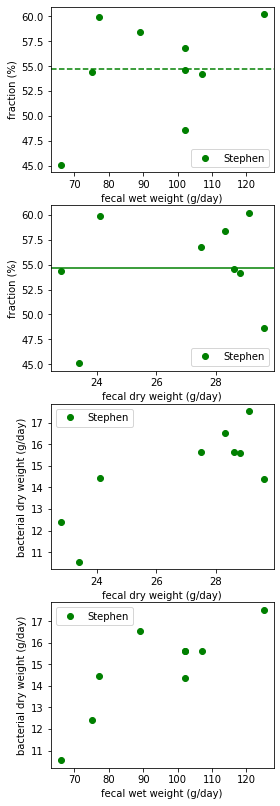

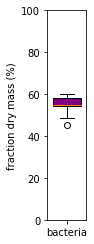

In [18]:

wet=BDdata['WET_Stephen']
dry=BDdata['DRY_Stephen']
frac=BDdata['FRAC_Stephen']
dry_bacteria=dry*frac/100.

#plot dierent relations between wet and dry weight, and fraction of bacteria

fig, axs = plt.subplots(4,1, figsize=(4,4*3.5))
#axs=[axs]


axs[0].plot(wet,frac,marker='o',ls='',c='g',label='Stephen')
axs[0].axhline(frac.mean(),c='g',ls='--')
axs[0].set_xlabel('fecal wet weight (g/day)')
axs[0].set_ylabel('fraction (%)')
axs[0].legend()

axs[1].plot(dry,frac,marker='o',ls='',c='g',label='Stephen')
axs[1].axhline(frac.mean(),c='g')
axs[1].set_xlabel('fecal dry weight (g/day)')
axs[1].set_ylabel('fraction (%)')
axs[1].legend()

axs[2].plot(dry,dry_bacteria,marker='o',ls='',c='g',label='Stephen')
axs[2].set_xlabel('fecal dry weight (g/day)')
axs[2].set_ylabel('bacterial dry weight (g/day)')
axs[2].legend()

axs[3].plot(wet,dry_bacteria,marker='o',ls='',c='g',label='Stephen')
axs[3].set_xlabel('fecal wet weight (g/day)')
axs[3].set_ylabel('bacterial dry weight (g/day)')
axs[3].legend()

display("mean fraction bacteria")
display(frac.mean())
display("std frac bacteria")
display(frac.std())

####################
# plot box plots
####################

fig, axs = plt.subplots(1,1, figsize=(1.4,3.5))
axs=[axs]

databox=[frac[:-1]]
display(dry_bacteria)
bplot1=axs[0].boxplot(databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
colors=[colorrefdiet]*2
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)



        
axs[0].set_ylabel('fraction dry mass (%)')
axs[0].set_ylim(0,100)
fig.tight_layout()
fig.savefig("plot_output/BRITISH_fraction.pdf")

#0.25 fraction of wet weight which is dry weight (for reference diet)
#0.548 fracion o dry weiht which is bacteria
#20 mmol/g bacteria release of SCFA
# 1.3 kJ/mol energy content of average fermentation product
# 0.234 kcal
#print("averages")
#print(y.mean())
print("av and std fraction bacteria")
print(frac.mean())
print(frac.std())

BD_fecealfractionbac=frac.mean()/100.
BD_fecealfractionbacstd=frac.std()/100.


# British diet - basic characteristics


,Quarter,energy,protein,fat,carbohydrate,sugar,fiber,fiber_std
0,JanMarch,2260,72.0,106,273,59,19.9,5.3
1,AprilJune,2210,70.9,102,269,59,19.9,5.3
2,JulySept,2330,73.7,107,285,59,19.9,5.3
3,OctDec,2300,71.6,107,280,59,19.9,5.3


energy British diet
2275.0


'Energy'

2275.0

estimated carb reaching LI for british diet
44.6025
31.264999999999997
57.410000000000004


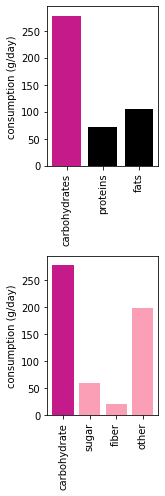

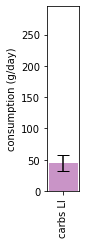

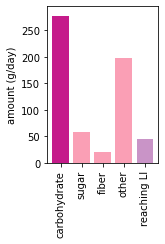

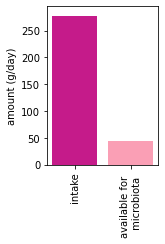

In [19]:
BDbasics=pd.read_excel('britishrefdiet.xlsx',skiprows=1)
#this is from 1976
#Houshold food consumption and expenditure Anual report of....
display(BDbasics)
BD_energy=BDbasics['energy'].mean()
print("energy British diet")
print(BD_energy)

BD_carbohydrates=BDbasics['carbohydrate'].mean()
BD_sugar=BDbasics['sugar'].mean()
BD_protein=BDbasics['protein'].mean()
BD_fat=BDbasics['fat'].mean()
BD_fiber=BDbasics['fiber'].mean()
BD_fiber_low=BD_fiber-BDbasics['fiber_std'].mean()
BD_fiber_high=BD_fiber+BDbasics['fiber_std'].mean()
display("Energy")
display(BD_energy)



fig, axs = plt.subplots(2,1, figsize=(2.4,2*3.5))

axs[0].bar([1,2,3],[BD_carbohydrates,BD_protein,BD_fat],color=['#c51b8a','k','k','k'])
    
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel('consumption (g/day)')
axs[0].set_xticks([1,2,3])
axs[0].set_xticklabels(["carbohydrates","proteins","fats"],rotation=90)
axs[0].set_ylim(0,295)

#

axs[1].bar([1,2,3,4],[BD_carbohydrates,BD_sugar,BD_fiber,BD_carbohydrates-BD_sugar-BD_fiber],color=['#c51b8a','#fa9fb5','#fa9fb5','#fa9fb5'])
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
axs[1].set_ylabel('consumption (g/day)')
axs[1].set_xticks([1,2,3,4])
axs[1].set_xticklabels(["carbohydrate","sugar","fiber","other"],rotation=90)
axs[1].set_ylim(0,295)
fig.tight_layout()
fig.savefig("plot_output/BRITISH_composition.pdf")


#given this composition of the diet, estimate how much is reaching the LI
BD_carbLI=estimate_carbsforbacteria(BD_carbohydrates,BD_fiber,BD_sugar,fiberdigestion=0.75,starchpassage=0.15)
BD_carbLI_low=estimate_carbsforbacteria(BD_carbohydrates,BD_fiber_low,BD_sugar,fiberdigestion=0.75,starchpassage=0.1)
BD_carbLI_high=estimate_carbsforbacteria(BD_carbohydrates,BD_fiber_high,BD_sugar,fiberdigestion=0.75,starchpassage=0.2)
BD_carbLI_error=(BD_carbLI_high-BD_carbLI_low)/2.
print("estimated carb reaching LI for british diet")
print(BD_carbLI)
print(BD_carbLI_low)
print(BD_carbLI_high)



#plot amount reaching large intestine
fig, axs = plt.subplots(1,1, figsize=(1.3,3.5))
axs=[axs]

axs[0].bar([1],[BD_carbLI],color=['#c994c7'],yerr=BD_carbLI_error,capsize=capsize)
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel('consumption (g/day)')
axs[0].set_xticks([1])
axs[0].set_xticklabels(["carbs LI"],rotation=90)
axs[0].set_ylim(0,295)


fig.tight_layout()
fig.savefig("plot_output/BRITISH_carbLI.pdf")




###
# plot carbon content reaching diet
###


fig, axs = plt.subplots(1,1, figsize=(2.4,1*3.5))
axs=[axs]
axs[0].bar([1,2,3,4,5],[BD_carbohydrates,BD_sugar,BD_fiber,BD_carbohydrates-BD_sugar-BD_fiber,BD_carbLI],color=['#c51b8a','#fa9fb5','#fa9fb5','#fa9fb5','#c994c7'])
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
axs[0].set_ylabel('amount (g/day)')
axs[0].set_xticks([1,2,3,4,5])
axs[0].set_xticklabels(["carbohydrate","sugar","fiber","other","reaching LI"],rotation=90)
axs[0].set_ylim(0,295)
fig.tight_layout()
fig.savefig("plot_output/BRITISH_composition_carb.pdf")


fig, axs = plt.subplots(1,1, figsize=(2.4,1*3.5))
axs=[axs]
axs[0].bar([1,2],[BD_carbohydrates,BD_carbLI],color=['#c51b8a','#fa9fb5'])
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
axs[0].set_ylabel('amount (g/day)')
axs[0].set_xticks([1,2])
axs[0].set_xticklabels(["intake","available for \n microbiota"],rotation=90)
axs[0].set_ylim(0,295)
fig.tight_layout()
fig.savefig("plot_output/BRITISH_composition_carb2.pdf")



#the 15% starch passage gives a number which is in agreement with what has been reported

# Calculation fermentation products / energy contribution for British diet (via feces)

# Start with reference scenario

av and std bacterial dry mass (std derived taking variation of fecal dry weight and fraction of bacteria into account)
Ferm products from feces
406.5722512012446
Energy from feces - kcal and fraction
125.64242126189889
0.05522743791731819
rel error when taking only fecal weight variaion and bacterial fraction into acoount (not change in microbiota composition) 
0.24921571919230415
error ferm productions when taking only fecal weight variation and bacterial fraction into account
101.32419598675233
error fraction when taking only fecal weight variaion and bacterial fraction into acoount (not change in microbiota composition) (av, or only ER, or only BT)
0.013763545659712781


0    12.4032
1    14.4359
2    15.6096
3    17.5182
4    10.5534
5    16.5272
6    14.3856
7    15.6200
8    15.6156
9        NaN
dtype: float64

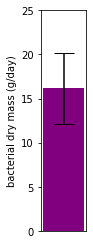

In [24]:
#start with calculating bacterial dry mass
print("av and std bacterial dry mass (std derived taking variation of fecal dry weight and fraction of bacteria into account)")

bacmass=BD_fecaldrymass*BD_fecealfractionbac
BC_bacterialdrymass=bacmass
#calculate energy fraction
BD_energybacteria_fromfeces,BD_ferm_fromfeces,BD_ferm_fromfeces_g,BD_ferm_fromfeces_gsum,BD_ferm_fromfeces_cc=energycalc(bacmass,scenario='reference',calctype='from_feces')
BD_energyfrac_fromfeces=BD_energybacteria_fromfeces/BD_energy

#energycalc(inputv,scenario='reference',calctype='fromcarbs')
print("Ferm products from feces")
print(BD_ferm_fromfeces)
print("Energy from feces - kcal and fraction")
print(BD_energybacteria_fromfeces)
print(BD_energyfrac_fromfeces)

#####
#calculate relative errors
#####
#relative error accumulates
relerror=np.sqrt(np.power(BD_fecealfractionbacstd/BD_fecealfractionbac,2)+np.power(BD_fecaldrymassstd/BD_fecaldrymass,2)) #takes fecal mass variation and fraction bac dry mass into account
BD_energyfrac_fromfeces_error=relerror*BD_energyfrac_fromfeces
BD_ferm_fromfeces_error=relerror*BD_ferm_fromfeces
BD_ferm_fromfeces_gsum_error=relerror*BD_ferm_fromfeces_gsum


print("rel error when taking only fecal weight variaion and bacterial fraction into acoount (not change in microbiota composition) ")
print(relerror)
print("error ferm productions when taking only fecal weight variation and bacterial fraction into account")
print(BD_ferm_fromfeces_error)
print("error fraction when taking only fecal weight variaion and bacterial fraction into acoount (not change in microbiota composition) (av, or only ER, or only BT)")
print(BD_energyfrac_fromfeces_error)



fig, axs = plt.subplots(1,1, figsize=(1.4,3.5))
axs=[axs]

databox=[frac[:-1]]
display(dry_bacteria)
bplot1=axs[0].bar(1,bacmass,yerr=bacmass*relerror,color=colorrefdiet,capsize=10)
axs[0].set_ylabel('bacterial dry mass (g/day)')
axs[0].set_ylim(0,25)
axs[0].set_xticks([])
fig.tight_layout()
fig.savefig("plot_output/BRITISH_bacterialdrymass2.pdf")

# Calculation energy contribution of bacteira for British ref diet (via carb content)

In [75]:
#todo: check if energy calculations, why are the numbers so different for the different ways to estimate?

'energy and ferm products from carbs'

141.22115565031726
456.9842143546979


'ferm products from feces'

406.5722512012446
101.32419598675233


'ferm products from carbs'

456.9842143546979
133.93702465448777


'energy from bact and fraction'

141.22115565031726

0.062075233252886705

0.043512856177378004

0.07989998634713806

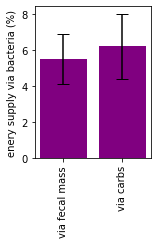

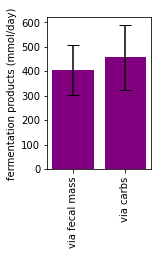

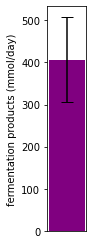

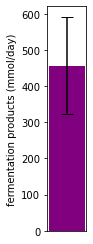

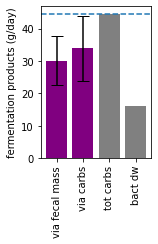

In [25]:

BD_energy_fromcarbs,BD_ferm_fromcarbs,BD_ferm_fromcarbs_g,BD_ferm_fromcarbs_gsum,BD_ferm_fromcarbs_cc=energycalc(BD_carbLI,scenario='reference',calctype='from_carbs')
BD_energyfrac_fromcarbs=BD_energy_fromcarbs/BD_energy

display("energy and ferm products from carbs")
print(BD_energy_fromcarbs)
print(BD_ferm_fromcarbs)

#errors from variation in carbon
relerror=BD_carbLI_error/BD_carbLI
BD_ferm_fromcarbs_error=relerror*BD_ferm_fromcarbs
BD_ferm_fromcarbs_gsum_error=relerror*BD_ferm_fromcarbs_gsum

BD_energy_fromcarbs_error=relerror*BD_energy_fromcarbs
BD_energyfrac_fromcarbs_error=relerror*BD_energyfrac_fromcarbs

display("ferm products from feces")
print(BD_ferm_fromfeces)
print(BD_ferm_fromfeces_error)
display("ferm products from carbs")
print(BD_ferm_fromcarbs)
print(BD_ferm_fromcarbs_error)

#estimation o lower and upper bound
BD_energy_fromcarbs_low,BD_ferm_fromcarbs_low,BD_ferm_fromcarbs_low_g,BD_ferm_fromcarbs_low_gsum,cc2=energycalc(BD_carbLI_low,scenario='reference',calctype='from_carbs')
BD_energy_fromcarbs_high,BD_ferm_fromcarbs_high,BD_ferm_fromcarbs_high_g,BD_ferm_fromcarbs_high_gm,cc2=energycalc(BD_carbLI_high,scenario='reference',calctype='from_carbs')
BD_energyfrac_fromcarbs_low=BD_energy_fromcarbs_low/BD_energy
BD_energyfrac_fromcarbs_high=BD_energy_fromcarbs_high/BD_energy
BD_energyfrac_fromcarbs_error=(BD_energyfrac_fromcarbs_high-BD_energyfrac_fromcarbs_low)/2

display("energy from bact and fraction")
display(BD_energy_fromcarbs)
display(BD_energyfrac_fromcarbs)
display(BD_energyfrac_fromcarbs_low)
display(BD_energyfrac_fromcarbs_high)



#compare different estimations (from fecal weight, and from carbs reaching LI

#
#plot energy fraction for both types of measurements
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]

axs[0].bar([1,2],[BD_energyfrac_fromfeces*100,BD_energyfrac_fromcarbs*100],yerr=[100*BD_energyfrac_fromfeces_error,100*BD_energyfrac_fromcarbs_error],color=[colorrefdiet,colorrefdiet],capsize=capsize)
  
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel(labelenergybacfrac)
axs[0].set_xticks([1,2])
axs[0].set_xticklabels(["via fecal mass","via carbs"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_carbLI.pdf")


#
#plot amount of 



#plot energy fraction for both types of measurements
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]

axs[0].bar([1,2],[BD_ferm_fromfeces,BD_ferm_fromcarbs],yerr=[BD_ferm_fromfeces_error,BD_ferm_fromcarbs_error],color=[colorrefdiet,colorrefdiet],capsize=capsize)
  
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel("fermentation products (mmol/day)")
axs[0].set_xticks([1,2])
axs[0].set_xticklabels(["via fecal mass","via carbs"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_carbLI_ferm2.pdf")




#plot energy fraction for both types of measurements


fig, axs = plt.subplots(1,1, figsize=(1.4,3.5))
axs=[axs]


axs[0].bar([1],[BD_ferm_fromfeces],yerr=[BD_ferm_fromfeces_error],color=[colorrefdiet],capsize=capsize)
  
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel("fermentation products (mmol/day)")
axs[0].set_xticks([])
#axs[0].set_xticklabels(["via fecal mass","via carbs"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_carbLI_ferm2_feconly.pdf")




fig, axs = plt.subplots(1,1, figsize=(1.4,3.5))
axs=[axs]


axs[0].bar([1],[BD_ferm_fromcarbs],yerr=[BD_ferm_fromcarbs_error],color=[colorrefdiet],capsize=capsize)
  
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel("fermentation products (mmol/day)")
axs[0].set_xticks([])
#axs[0].set_xticklabels(["via fecal mass","via carbs"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_carbLI_ferm2_carbsonly.pdf")




#plot energy fraction for both types of measurements in g
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]

axs[0].bar([1,2],[BD_ferm_fromfeces_gsum,BD_ferm_fromcarbs_gsum],yerr=[BD_ferm_fromfeces_gsum_error,BD_ferm_fromcarbs_gsum_error],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[0].bar([3,4],[BD_carbLI,BC_bacterialdrymass],color=['gray','gray'])

  
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].axhline(BD_carbLI,ls='--')


axs[0].set_ylabel("fermentation products (g/day)")
axs[0].set_xticks([1,2,3,4])
axs[0].set_xticklabels(["via fecal mass","via carbs","tot carbs","bact dw"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_carbLI_ferm2_grom.pdf")







## Fig. S2: Add figure how "carbs available for microbiota" changes with fiber digestion fraction and starch absorbance
--> Standard: 0.5 fiber digestion, 0.1 starch passage #Englyst. Fiber unclear, but we show that it does not matter much for British ref diet
e.g. panel: vary fiber digestion fraction on x-axis (show different lines for starch passage (0.05,0.1,0.15)
possible: add other panel showing how total FPs change with fiber digestion fraction



NameError: name 'energycalc_fromcarbs' is not defined

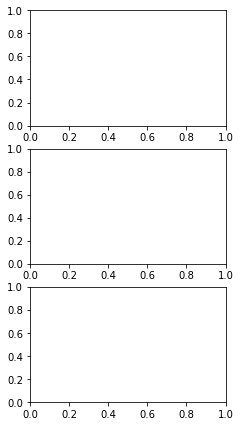

In [37]:

#plot change of fraction

fig, axs = plt.subplots(3,1, figsize=(3.5,3*2.4))
fiberabsorption=np.linspace(0,75,50)

colorlist=['b','g','m']

iS = -1
for starchpassage in [0.05,0.1,0.15]:
    iS = iS+1
    carbreachLI=[]
    carbreachLIen=[]
    carbreachLIferm=[]
    
    for iF in range(0,fiberabsorption.shape[0]):
        carbreachLI.append(estimate_carbsforbacteria(BD_carbohydrates,BD_fiber,BD_sugar,fiberdigestion=fiberabsorption[iF]/100.,starchpassage=starchpassage))
        curen,curferm,fermg,fermg2 = energycalc_fromcarbs(carbreachLI[-1],0.5)
        carbreachLIen.append(curen)
        carbreachLIferm.append(curferm)
        
    axs[0].plot(fiberabsorption,carbreachLI,label=starchpassage,color=colorlist[iS])
    axs[1].plot(fiberabsorption,carbreachLIen,color=colorlist[iS])
    axs[2].plot(fiberabsorption,carbreachLIferm,color=colorlist[iS])

#axs[0].set_ylim(0,50)
axs[1].set_ylim(0,120)
axs[2].set_ylim(0,350)
axs[0].legend(title='passage strach')

#labels e
axs[0].set_ylabel('carbohydrats available \n for microbiota (g/day)')
axs[2].set_ylabel('fermentation products\n (mmol/day)')
axs[1].set_ylabel('energy(kcal/day)')
xlabel="utilizable fraction of fiber (%)"
axs[0].set_xlabel(xlabel)
axs[1].set_xlabel(xlabel)
axs[2].set_xlabel(xlabel)
standardc=50
axs[0].axvline(standardc,color='k',alpha=0.5,ls='--')
axs[1].axvline(standardc,color='k',alpha=0.5,ls='--')
axs[2].axvline(standardc,color='k',alpha=0.5,ls='--')

fig.tight_layout()
fig.savefig("plot_output/BRITISH_variation_uptake.pdf")




# Plots total amount of fermentation products reaching large intestine

For Fig. S
add as a side point how little of those fermentation products are recovered in feces


9.041213793103447
9.041213793103447
9.041213793103447
30.13139976158275
2408.6549845119844
3042.996999712246


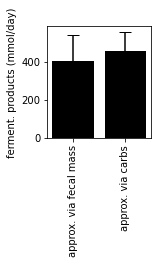

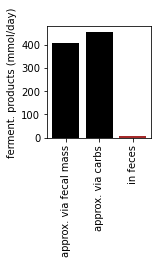

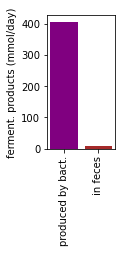

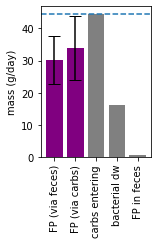

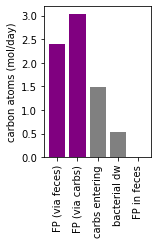

In [50]:

#plot energy fraction for both types of measurements
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]

#how much mmol of fermentation products in feces
#typical value is 80mmol/l (or 76.8 mmol/l as reported in the following)
#https://pubmed.ncbi.nlm.nih.gov/6740214/
ferminfeces=BD_bacwetweight*76.8/1000.
ferminfeces_upper=BD_bacwetweight*190/1000.
ferminfeces_lower=BD_bacwetweight*30/1000.
ferminfeces_err=(ferminfeces_upper-ferminfeces_lower)/2.

print(ferminfeces)
axs[0].bar([1,2],[BD_ferm_fromfeces,BD_ferm_fromcarbs],color=['k','k'],yerr=[BD_ferm_fromcarbs_error,BD_ferm_fromfeces_error],capsize=capsize)

    
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
axs[0].set_ylabel('ferment. products (mmol/day)')
axs[0].set_xticks([1,2])
axs[0].set_xticklabels(["approx. via fecal mass","approx. via carbs"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_ferm.pdf")

#plot energy fraction for both types of measurements
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]

#how much mmol of fermentation products in feces
#typical value is 80mmol/l (or 76.8 mmol/l as reported in the following)
#https://pubmed.ncbi.nlm.nih.gov/6740214/
ferminfeces=BD_bacwetweight*76.8/1000.
ferminfeces_upper=BD_bacwetweight*190/1000.
ferminfeces_lower=BD_bacwetweight*30/1000.
ferminfeces_err=(ferminfeces_upper-ferminfeces_lower)/2.
ferminfeces_g=ferminfeces*0.08 #assume roughly average
print(ferminfeces)
axs[0].bar([1,2,3],[BD_ferm_fromfeces,BD_ferm_fromcarbs,ferminfeces],color=['k','k','brown'])
        
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
axs[0].set_ylabel('ferment. products (mmol/day)')
axs[0].set_xticks([1,2,3])
axs[0].set_xticklabels(["approx. via fecal mass","approx. via carbs","in feces"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_ferm_includeinfeces.pdf")



#plot energy fraction for both types of measurements
fig, axs = plt.subplots(1,1, figsize=(1.8,3.5))
axs=[axs]

#how much mmol of fermentation products in feces
#typical value is 80mmol/l (or 76.8 mmol/l as reported in the following)
#https://pubmed.ncbi.nlm.nih.gov/6740214/
#ferminfeces=BD_bacwetweight*76.8/1000.
#ferminfeces_upper=BD_bacwetweight*190/1000.
#ferminfeces_lower=BD_bacwetweight*30/1000.
#ferminfeces_err=(ferminfeces_upper-ferminfeces_lower)/2.

print(ferminfeces)
axs[0].bar([1,2],[BD_ferm_fromfeces,ferminfeces],color=[colorrefdiet,'brown'])
        
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
axs[0].set_ylabel('ferment. products (mmol/day)')
axs[0].set_xticks([1,2])
axs[0].set_xticklabels(["produced by bact.","in feces"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_ferm_2.pdf")


#plot energy fraction for both types of measurements in g
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]
print(BD_ferm_fromfeces_gsum)

axs[0].bar([1,2],[BD_ferm_fromfeces_gsum,BD_ferm_fromcarbs_gsum],yerr=[BD_ferm_fromfeces_gsum_error,BD_ferm_fromcarbs_gsum_error],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[0].bar([3,4],[BD_carbLI,BC_bacterialdrymass],color=['gray','gray'])
axs[0].bar([5],[ferminfeces_g],color=['gray'])



  
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].axhline(BD_carbLI,ls='--')


axs[0].set_ylabel("mass (g/day)")
axs[0].set_xticks([1,2,3,4,5])
axs[0].set_xticklabels(["FP (via feces)","FP (via carbs)","carbs entering","bacterial dw","FP in feces"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_carbLI_ferm2_grom_withfecal.pdf")




#plot carbs
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]
print(BD_ferm_fromfeces_cc)
print(BD_ferm_fromcarbs_cc)
axs[0].bar([1,2],[BD_ferm_fromfeces_cc/1000.,BD_ferm_fromcarbs_cc/1000.],color=[colorrefdiet,colorrefdiet])
axs[0].bar([3,4],[BD_carbLI*6/0.180/1000.,BC_bacterialdrymass*0.4/0.012/1000.],color=['gray','gray']) #assuming 40 drymass
axs[0].bar([5],[ferminfeces_g/0.07/1000.],color=['gray'])


  
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel("carbon atoms (mol/day)")
axs[0].set_xticks([1,2,3,4,5])
axs[0].set_xticklabels(["FP (via feces)","FP (via carbs)","carbs entering","bacterial dw","FP in feces"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output/BRITISH_carbLI_ferm2_grom_withfecal_carbs.pdf")






In [15]:

#
BD_bacwetweight
BD_energy
BD_carbohydrates
BD_sugar
BD_fiber
BD_energybacteria
BD_energyfrac

NameError: name 'BD_energybacteria' is not defined

## major output of the calculations:
Average energy contribution is 4.8%
Energy contribution (only ER): 6%
Energy contribution (only BR) 3.6%

taking variation in fecal mass into account
Lower limit: 2.7%
Upper limit: 7.5%

# NHANES and distribution in the US

In [16]:
#read in data from NHANES
#https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Dietary
#newest data from NHANES 2018, available since June 2020
#N2018=pd.read_sas("DR1IFF_J2.XPT.txt",format='xport')
#display(N2018.shape)
N2017=pd.read_sas("DR1IFF_J.XPT",format='xport')
display(N2017.shape)
display(N2017.columns)

(112683, 84)

Index(['SEQN', 'WTDRD1', 'WTDR2D', 'DR1ILINE', 'DR1DRSTZ', 'DR1EXMER', 'DRABF',
       'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1CCMNM', 'DR1CCMTX',
       'DR1_020', 'DR1_030Z', 'DR1FS', 'DR1_040Z', 'DR1IFDCD', 'DR1IGRMS',
       'DR1IKCAL', 'DR1IPROT', 'DR1ICARB', 'DR1ISUGR', 'DR1IFIBE', 'DR1ITFAT',
       'DR1ISFAT', 'DR1IMFAT', 'DR1IPFAT', 'DR1ICHOL', 'DR1IATOC', 'DR1IATOA',
       'DR1IRET', 'DR1IVARA', 'DR1IACAR', 'DR1IBCAR', 'DR1ICRYP', 'DR1ILYCO',
       'DR1ILZ', 'DR1IVB1', 'DR1IVB2', 'DR1INIAC', 'DR1IVB6', 'DR1IFOLA',
       'DR1IFA', 'DR1IFF', 'DR1IFDFE', 'DR1ICHL', 'DR1IVB12', 'DR1IB12A',
       'DR1IVC', 'DR1IVD', 'DR1IVK', 'DR1ICALC', 'DR1IPHOS', 'DR1IMAGN',
       'DR1IIRON', 'DR1IZINC', 'DR1ICOPP', 'DR1ISODI', 'DR1IPOTA', 'DR1ISELE',
       'DR1ICAFF', 'DR1ITHEO', 'DR1IALCO', 'DR1IMOIS', 'DR1IS040', 'DR1IS060',
       'DR1IS080', 'DR1IS100', 'DR1IS120', 'DR1IS140', 'DR1IS160', 'DR1IS180',
       'DR1IM161', 'DR1IM181', 'DR1IM201', 'DR1IM221', 'DR1IP182', 'DR1IP183',

### Looking at age distribution of participants

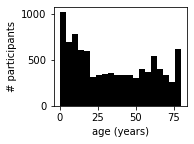

In [81]:
#looking at demographic data

N2017demo=pd.read_sas("DEMO_J.XPT",format='xport')
#display(N2017demo.shape)
#display(N2017demo)
#display(N2017.shape)


fig, axs = plt.subplots(1,1, figsize=(2.8,1*2.1))
axs=[axs]
axs[0].hist(N2017demo['RIDAGEYR'],bins=20,density=False,label='NHANES 2017/18',color='k')
axs[0].set_xlabel('age (years)')
axs[0].set_ylabel('# participants')
fig.tight_layout()


fig.savefig("plot_output/NHANES_age_distribution.pdf")

#Respondent sequence number

In [1]:

densitychoice=False
ylabelhis="# individuals"
#plot a few examples

perin=N2017.groupby('SEQN', as_index=False).sum()
display(perin.head())
display(perin.shape) 
display(N2017demo.head()) 


colorh=colorNHANES
perin=perin.merge(N2017demo,on="SEQN",how='left')
display(perin.head())
display(perin.shape)


if 3>2:
    #fiberdigestion in [.5]:
    fiberdigestion=.5
    ####
    #select which individuals to look at 
    #only look at adjults
    ####
    perin=perin.query('RIDAGEYR >= 20') #here all above age 20

    #plot distribution of ages
    fig, axs = plt.subplots(2,1, figsize=(2.8,2*2.1))
    axs[0].hist(perin['RIDAGEYR'],bins=20,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[0].set_xlabel('age (years)')
    plt.savefig("nutrient_distribution.pdf")
    plt.tight_layout()


    ####
    #plot major characteristics of diet
    ####


    fig, axs = plt.subplots(12,1, figsize=(3.8,12*2.1))
    c=-1


    #plot histogram of proteins
    c=c+1
    axs[c].hist(perin['DR1IPROT'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("protein consumption (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1IPROT'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,300)
    axs[c].axvline(BD_protein,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()




    #plot histogram of fiber
    c=c+1
    axs[c].hist(perin['DR1IFIBE'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("fiber consumption (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1IFIBE'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,60)
    axs[c].axvline(BD_fiber,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()




    c=c+1
    #plot histogram of total carbohydrates
    axs[c].hist(perin['DR1ICARB'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("carbohydrate consumption (g/day)")
    axs[c].axvline(perin['DR1ICARB'].mean(),ls='--',color=colorav)
    axs[c].set_ylabel(ylabelhis)
    axs[c].set_xlim(0,550)
    axs[c].axvline(BD_carbohydrates,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    c=c+1
    #plot histogram of sugars
    axs[c].hist(perin['DR1ISUGR'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("sugar consumption (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1ISUGR'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,250)
    axs[c].axvline(BD_sugar,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    #estimate carbon reaching LI
    c=c+1

    ######
    #calculate carbohydrates which is available for bacterial digestion
    ######

    perin["carbLI"]=estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=fiberdigestion,starchpassage=0.15)
    perin["carbLI05"]=estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.5,starchpassage=0.15)
    perin["carbLI025"]=estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.25,starchpassage=0.15)
    perin["carbLI075"]=estimate_carbsforbacteria(perin['DR1ICARB'],perin['DR1IFIBE'],perin['DR1ISUGR'],fiberdigestion=0.75,starchpassage=0.15)

    #perin["carbLI"]=0.75*perin['DR1IFIBE']+0.2*(perin['DR1ICARB']-perin['DR1ISUGR']-perin['DR1IFIBE'])
    #resistantstarch=0.2*(perin['DR1ICARB']-perin['DR1ISUGR']-perin['DR1IFIBE'])
    #ratiostarchfiber=0.2*(perin['DR1ICARB']-perin['DR1ISUGR']-perin['DR1IFIBE'])/(0.75*perin['DR1IFIBE'])
    #display(resistantstarch.mean())
    #display(ratiostarchfiber.mean())

    #plot histogram of carbohydrates
    
    #axs[c].hist(perin['carbLI'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    #
    axs[c].hist(perin['carbLI05'],bins=40,density=densitychoice,label='0.5',color=colorh,alpha=0.3)
    axs[c].hist(perin['carbLI025'],bins=40,density=densitychoice,label='0.25',color='r',alpha=0.3)
    axs[c].hist(perin['carbLI075'],bins=40,density=densitychoice,label='0.75',color='g',alpha=0.3)
    
    
    axs[c].set_xlabel("carbohydrates reaching LI (g/day)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].set_xlim(0,120)
    axs[c].axvline(perin['carbLI'].mean(),ls='--',color=colorav)
    axs[c].axvline(BD_carbLI,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend(title='frac. fiber utilization')




    #BD_energy
    #BD_carbohydrates
    #BD_sugar
    #BD_fiber
    #BD_energybacteria
    #BD_energyfrac



    c=c+1
    #plot histogram of calories
    axs[c].hist(perin['DR1IKCAL'],bins=40,density=densitychoice,label='NHANES 2017/18',color=colorh,alpha=0.5)
    axs[c].set_xlabel("daily energy demand (kcal)")
    axs[c].set_ylabel(ylabelhis)
    axs[c].axvline(perin['DR1IKCAL'].mean(),ls='--',color=colorav)
    axs[c].set_xlim(0,4500)
    axs[c].axvline(BD_energy,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()


   
    
    c=c+1
    #plot histogram of energy 
    #perin["energyBonly"],perin["fermBonly"]=energycalc_fromcarbs(perin['carbLI075'],1.)
    #perin["energyEonly"],perin["fermEonly"]=energycalc_fromcarbs(perin['carbLI075'],0.)
    
    #calculate different energy contributions etc
    perin["energyBE"],perin["fermBE"],fermg,fermg2=energycalc(perin['carbLI075'],scenario='reference',calctype='from_carbs')
    perin["energyBE_1"],perin["fermBE_1"],fermg,fermg2=energycalc(perin['carbLI075'],scenario='scenario1',calctype='from_carbs')
    perin["energyBE_2"],perin["fermBE_2"],fermg,fermg2=energycalc(perin['carbLI075'],scenario='scenario2',calctype='from_carbs')
    perin["energyBE_3"],perin["fermBE_3"],fermg,fermg2=energycalc(perin['carbLI075'],scenario='scenario3',calctype='from_carbs')

    
    #axs[c].hist(perin['energyBonly'],bins=40,density=densitychoice,label='B. theta',color='b',alpha=0.5)
    #axs[c].hist(perin['energyEonly'],bins=40,density=densitychoice,label='E. rectale',color='r',alpha=0.5)
    axs[c].hist(perin['energyBE'],bins=40,density=False,label='NHANES 2017/18',color=colorNHANES,alpha=0.5)
    #axs[c].axvline(perin['energyBonly'].mean(),ls='--',color='b')
    #axs[c].axvline(perin['energyEonly'].mean(),ls='--',color='r')
    axs[c].axvline(perin['energyBE'].mean(),ls='--',color=colorav)
    #axs[c].hist(perin['energyBE'],bins=40,density=True,label='NHANES 2017/18',color='gray')
    axs[c].axvline(BD_energy_fromcarbs,ls='--',color=colorrefdiet,label='British ref. diet')

    axs[c].set_xlabel(labelenergybac)
    axs[c].set_ylabel(ylabelhis)
    #axs[c].axvline(perin['DR1IKCAL'].mean(),ls='--',color='r')
    #axs[c].set_xlim(0,4000)
    #axs[c].yaxis.set_major_formatter(PercentFormatter(1))

    #perin["energyfracBonly"]=perin['energyBonly']/perin['DR1IKCAL']*100
    #perin["energyfracEonly"]=perin['energyEonly']/perin['DR1IKCAL']*100
    perin["energyfracBE"]=perin['energyBE']/perin['DR1IKCAL']*100
    perin["energyfracBE_1"]=perin['energyBE_1']/perin['DR1IKCAL']*100
    perin["energyfracBE_2"]=perin['energyBE_2']/perin['DR1IKCAL']*100
    perin["energyfracBE_3"]=perin['energyBE_3']/perin['DR1IKCAL']*100

    axs[c].legend()

    c=c+1
    #plot histogram of energy contribution
    axs[c].hist(perin["energyfracBE_1"],bins=40,density=False,label='sc1',color='b',alpha=0.5)
    axs[c].hist(perin["energyfracBE_2"],bins=40,density=False,label='sc2',color='r',alpha=0.5)
    axs[c].hist(perin["energyfracBE_3"],bins=40,density=False,label='sc3',color=colorNHANES,alpha=0.5,zorder=-1)
    axs[c].set_xlabel(labelenergybacfrac)
    axs[c].set_ylabel(ylabelhis)     

    #axs[c].axvline(perin['energyfracBonly'].mean(),ls='--',color='b')
    #axs[c].axvline(perin['energyfracEonly'].mean(),ls='--',color='r')
    axs[c].axvline(perin['energyfracBE'].mean(),ls='--',color=colorav)
    axs[c].axvline(BD_energyfrac_fromcarbs*100,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()


    #axs[c].axvline(perin['DR1IKCAL'].mean(),ls='--',color='r')
    #axs[c].set_xlim(0,4000)

    #now the fraction again but plot calculations for different strains


    c=c+1
    #plot histogram of energy contribution
    axs[c].hist(perin["energyfracBE"],bins=40,density=False,label='B. theta',color='b',alpha=0.5)
    #axs[c].hist(perin["energyfracEonly"],bins=40,density=False,label='E.rectale',color='r',alpha=0.5)
    #axs[c].hist(perin["energyfracEonly"],bins=40,density=False,label='E.rectale',color='r',alpha=0.5)
    
    #axs[c].hist(perin["energyfracBE"],bins=40,density=True,label='mix',color='gray',alpha=0.5,zorder=-1)
    axs[c].set_xlabel(labelenergybacfrac)
    axs[c].set_ylabel(ylabelhis)

    #axs[c].axvline(perin['energyfracBonly'].mean(),ls='--',color='b')
    #axs[c].axvline(perin['energyfracEonly'].mean(),ls='--',color='r')
    #axs[c].axvline(perin['energyfracBE'].mean(),ls='--',color=colorav)
    axs[c].axvline(BD_energyfrac_fromcarbs*100,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].legend()

    ###plot fermentation products #mix of both strains
    c=c+1
    #plot histogram of energy contribution
    axs[c].hist(perin["fermBE"],bins=40,density=False,label='NHANES 2017/18',color=colorNHANES,alpha=0.5)
    #axs[c].hist(perin["energyfracBE"],bins=40,density=True,label='mix',color='gray',alpha=0.5,zorder=-1)
    axs[c].set_xlabel("fermentation products (mmol/day)")
    axs[c].set_ylabel(ylabelhis)

    axs[c].axvline(perin['fermBE'].mean(),ls='--',color=colorav)
    #axs[c].axvline(perin['energyfracBE'].mean(),ls='--',color=colorav)
    axs[c].axvline((BD_ferm_fromfeces+BD_ferm_fromcarbs)/2.,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].set_xlim(0,750)
    axs[c].legend()





    ###plot fermentation products, strains seperately
    c=c+1
    #plot histogram of energy contribution
  

    axs[c].hist(perin["fermBE_1"],bins=40,density=False,label='B. theta',color='b',alpha=0.5)
    axs[c].hist(perin["fermBE_2"],bins=40,density=False,label='E.rectale',color='r',alpha=0.5)
    axs[c].hist(perin["fermBE_3"],bins=40,density=False,label='mix',color='gray',alpha=0.5,zorder=-1)
    axs[c].set_xlabel("fermentation products (mmol/day)")
    axs[c].set_ylabel(ylabelhis)

    #axs[c].axvline(perin['fermBonly'].mean(),ls='--',color='b')
    #axs[c].axvline(perin['fermEonly'].mean(),ls='--',color='r')
    #axs[c].axvline(perin['energyfracBE'].mean(),ls='--',color=colorav)
    axs[c].axvline((BD_ferm_fromfeces+BD_ferm_fromcarbs)/2.,ls='--',color=colorrefdiet,label='British ref. diet')
    axs[c].set_xlim(0,750)
    axs[c].legend()





    #calculate energy contribution
    #perin['fractionenergy']/(perin['DR1IKCAL']*0.00419)


    plt.tight_layout()
    plt.savefig("plot_output/nutrient_distribution_NHANES"+str(fiberdigestion)+".pdf")

#fig, axs = plt.subplots(8,1, figsize=(2.8,8*2.1))
#ratiostarchfiber=0.2*(perin['DR1ICARB']-perin['DR1ISUGR']-perin['DR1IFIBE'])/(0.75*perin['DR1IFIBE'])
#display(resistantstarch.mean())
#display(ratiostarchfiber.mean())
#axs[0].hist(ratiostarchfiber,range=(0,4))
#plt.show()



NameError: name 'N2017' is not defined

# Hadza

## Todo: For Fig. 2, prepare plot for total carbohydrates (sum fiber and carbohydrate)

,month,fiber,protein,fat,carbohydrate,honey,carbLI05,carbLI025,carbLI075,kcal
0,1,101,124,49,326,103,77.9685,59.0310,96.9060,2241
1,2,74,64,43,400,367,56.3715,42.4965,70.2465,2243
2,3,78,105,41,363,193,67.1985,52.5735,81.8235,2241
3,4,24,103,49,347,402,26.6790,22.1790,31.1790,2241
4,5,45,119,50,330,281,42.3495,33.9120,50.7870,2246
5,6,66,98,39,375,233,61.0785,48.7035,73.4535,2243
6,7,102,129,41,340,16,87.8820,68.7570,107.0070,2245
7,8,88,183,72,216,51,61.0395,44.5395,77.5395,2244
8,9,52,243,89,118,27,34.8915,25.1415,44.6415,2245
9,10,93,194,77,194,31,61.3245,43.8870,78.7620,2245


4.591717507916694

15.730795281350382

4.591717507916694

15.730795281350382

add hazad
    month  fiber  protein  fat  carbohydrate  honey  carbLI05  carbLI025  \
0       1    101      124   49           326    103   77.9685    59.0310   
1       2     74       64   43           400    367   56.3715    42.4965   
2       3     78      105   41           363    193   67.1985    52.5735   
3       4     24      103   49           347    402   26.6790    22.1790   
4       5     45      119   50           330    281   42.3495    33.9120   
5       6     66       98   39           375    233   61.0785    48.7035   
6       7    102      129   41           340     16   87.8820    68.7570   
7       8     88      183   72           216     51   61.0395    44.5395   
8       9     52      243   89           118     27   34.8915    25.1415   
9      10     93      194   77           194     31   61.3245    43.8870   
10     11     94      129   36           350     11   86.8095    69.1845   
11     12     90      101   32           387    120   81.5400    64.6650   

 

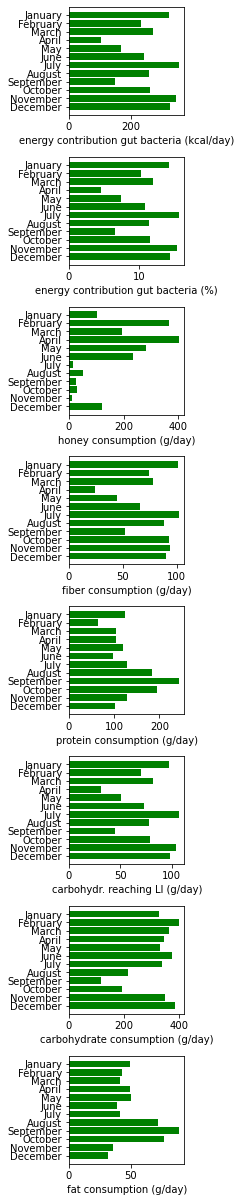

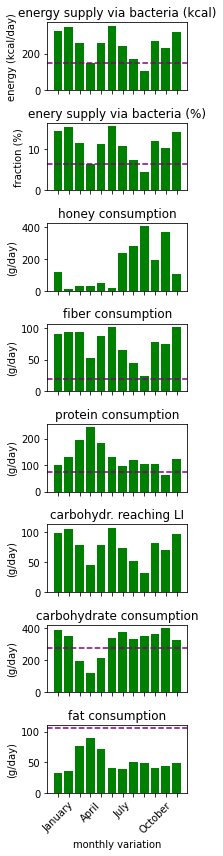

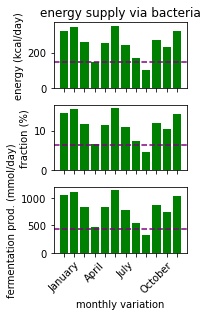

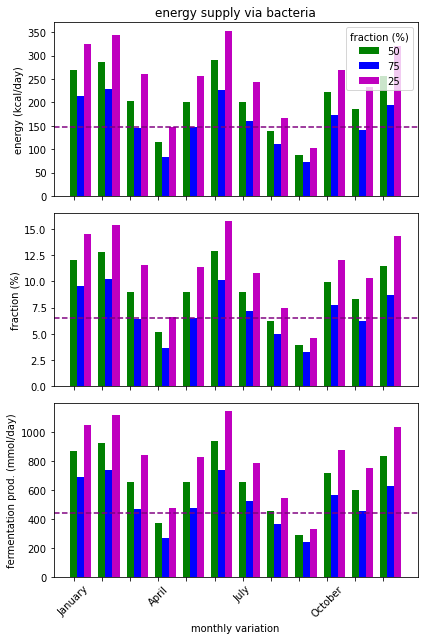

In [19]:
hadzadiet=pd.read_excel("Hadza_diet_Pontzeretal_table2.xlsx")




hadzadiet_listfiberfraction=[]
if 3>2:
    fiberfraction=0.75
    hadzadiet["carbLI05"]=fiberfraction*hadzadiet['fiber']*0.5+0.15*(hadzadiet['carbohydrate']-0.57*hadzadiet['honey'])
    hadzadiet["carbLI025"]=fiberfraction*hadzadiet['fiber']*0.25+0.15*(hadzadiet['carbohydrate']-0.57*hadzadiet['honey'])
    hadzadiet["carbLI075"]=fiberfraction*hadzadiet['fiber']*0.75+0.15*(hadzadiet['carbohydrate']-0.57*hadzadiet['honey'])
    
    #calculate caolories
    #4 calories per gram, protein provides 4 calories per gram, and fat provides 9 calories per gram.
    #improve, use data from other study.....
    hadzadiet["kcal"]=hadzadiet['carbohydrate']*4+hadzadiet['protein']*4+hadzadiet['fat']*9
    display(hadzadiet)

    hadzadiet["energyBE05"],hadzadiet['fermentationprodBE05'],fermg,fermg2=energycalc(hadzadiet["carbLI05"],scenario='reference',calctype='from_carbs')
    hadzadiet["energyBE075"],hadzadiet['fermentationprodBE075'],fermg,fermg2=energycalc(hadzadiet["carbLI075"],scenario='reference',calctype='from_carbs')
    hadzadiet["energyBE025"],hadzadiet['fermentationprodBE025'],fermg,fermg2=energycalc(hadzadiet["carbLI025"],scenario='reference',calctype='from_carbs')

    hadzadiet["energyfracBE05"]=hadzadiet['energyBE05']/hadzadiet["kcal"]*100
    hadzadiet["energyfracBE075"]=hadzadiet['energyBE075']/hadzadiet["kcal"]*100
    hadzadiet["energyfracBE025"]=hadzadiet['energyBE025']/hadzadiet["kcal"]*100

    
    #bar plot
    fig, axs = plt.subplots(8,1, figsize=(2.8,8*2.1))

    plt.savefig("nutrient_distribution.pdf")
    plt.tight_layout()

    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


    cc=0
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["energyBE075"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('energy contribution gut bacteria (kcal/day)')

    cc=1
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["energyfracBE075"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('energy contribution gut bacteria (%)')


    cc=2
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["honey"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('honey consumption (g/day)')


    cc=3
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["fiber"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('fiber consumption (g/day)')


    cc=4
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["protein"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('protein consumption (g/day)')


    cc=5
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["carbLI075"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('carbohydr. reaching LI (g/day)')


    cc=6
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["carbohydrate"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('carbohydrate consumption (g/day)')

    cc=7
    #plot energy calculations
    axs[cc].barh(range(12,0,-1), hadzadiet["fat"], align='center',color=colorHadza)
    axs[cc].set_yticks(range(1,13,1))
    axs[cc].set_yticklabels(months[::-1])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_xlabel('fat consumption (g/day)')

    plt.savefig("nutrient_distribution_Hadza"+str(fiberfraction)+".pdf")
    plt.tight_layout()
    display(hadzadiet['energyfracBE075'].min())
    display(hadzadiet['energyfracBE075'].max())
    hazav=hadzadiet['energyfracBE075'].mean()
    hazstd=hadzadiet['energyfracBE075'].std()

    #and now the intere thing as horizontal bar plots


    #bar plot
    fig, axs = plt.subplots(8,1, figsize=(2.8,8*1.5))

    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


    cc=0
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["energyBE075"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title(labelenergybac)
    axs[cc].set_ylabel("energy (kcal/day)")
    axs[cc].axhline(BD_energy_fromcarbs,color=colorrefdiet,ls='--')


    cc=1
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["energyfracBE075"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title(labelenergybacfrac)
    axs[cc].set_ylabel("fraction (%)")
    axs[cc].axhline(BD_energyfrac_fromcarbs*100,color=colorrefdiet,ls='--')


    cc=2
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["honey"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('honey consumption')
    axs[cc].set_ylabel('(g/day)')
    #axs[cc].axhline(BD_sugar,color=colorrefdiet,ls='--')



    cc=3
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["fiber"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('fiber consumption')
    axs[cc].set_ylabel('(g/day)')
    axs[cc].axhline(BD_fiber,color=colorrefdiet,ls='--')








    cc=4
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["protein"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('protein consumption')
    axs[cc].set_ylabel('(g/day)')
    axs[cc].axhline(BD_protein,color=colorrefdiet,ls='--')

    cc=5
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["carbLI075"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_ylabel('(g/day)')
    axs[cc].set_title('carbohydr. reaching LI')

    cc=6
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["carbohydrate"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title('carbohydrate consumption')
    axs[cc].set_ylabel('(g/day)')
    axs[cc].axhline(BD_carbohydrates,color=colorrefdiet,ls='--')

    cc=7
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["fat"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))

    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']

    axs[cc].set_xticklabels(months[::],rotation=45)
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title("fat consumption")
    axs[cc].set_ylabel('(g/day)')
    axs[cc].set_xlabel('monthly variation')
    axs[cc].axhline(BD_fat,color=colorrefdiet,ls='--')




    plt.tight_layout()
    plt.savefig("nutrient_distribution_Hadza_horizontal.pdf")




    #bar plot
    fig, axs = plt.subplots(3,1, figsize=(2.8,3*1.5))
    cc=-1
    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


    cc=cc+1
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["energyBE075"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title(labelenergybacfracnounit)
    axs[cc].set_ylabel("energy (kcal/day)")
    axs[cc].axhline(BD_energy_fromcarbs,color=colorrefdiet,ls='--')

    
    
    cc=cc+1
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet["energyfracBE075"], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fraction (%)")
    axs[cc].axhline(BD_energyfrac_fromcarbs*100,color=colorrefdiet,ls='--')


    cc=cc+1
    #plot energy calculations
    axs[cc].bar(range(12,0,-1), hadzadiet['fermentationprodBE075'], align='center',color=colorHadza)
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fermentation prod. (mmol/day)")
    axs[cc].axhline((BD_ferm_fromfeces+BD_ferm_fromcarbs)/2.,color=colorrefdiet,ls='--')



    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']

    axs[cc].set_xticklabels(months[::],rotation=45)
    axs[cc].set_xlabel('monthly variation')

    plt.savefig("nutrient_distribution_Hadza_horizontal_energyonly.pdf")
    plt.tight_layout()

    #######################
    ####plot different fiber digestion rates
    #######################
    
    
    #bar plot
    fig, axs = plt.subplots(3,1, figsize=(6,3*3))
    cc=-1
    #bar plot
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


    cc=cc+1
    #plot energy calculations
    axs[cc].bar(np.array(range(12,0,-1))+0, hadzadiet["energyBE05"],width=0.25, align='center',color=colorHadza,label='50')
    axs[cc].bar(np.array(range(12,0,-1))+0.25, hadzadiet["energyBE025"],width=0.25, align='center',color="b",label='75')
    axs[cc].bar(np.array(range(12,0,-1))+0.5, hadzadiet["energyBE075"],width=0.25, align='center',color="m",label='25')
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    
    
    #ax.invert_yaxis()  # labels read top-to-bottom
    axs[cc].set_title(labelenergybacfracnounit)
    axs[cc].set_ylabel("energy (kcal/day)")
    axs[cc].axhline(BD_energy_fromcarbs,color=colorrefdiet,ls='--')
    axs[cc].legend(title="fraction (%)")
    
    
    
    cc=cc+1
    #plot energy calculations
    axs[cc].bar(np.array(range(12,0,-1))+0, hadzadiet["energyfracBE05"],width=0.25, align='center',color=colorHadza)
    axs[cc].bar(np.array(range(12,0,-1))+0.25, hadzadiet["energyfracBE025"],width=0.25, align='center',color="b")
    axs[cc].bar(np.array(range(12,0,-1))+0.5, hadzadiet["energyfracBE075"],width=0.25, align='center',color="m")
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fraction (%)")
    axs[cc].axhline(BD_energyfrac_fromcarbs*100,color=colorrefdiet,ls='--')

    
    cc=cc+1
    #plot energy calculations
    axs[cc].bar(np.array(range(12,0,-1))+0, hadzadiet["fermentationprodBE05"],width=0.25, align='center',color=colorHadza)
    axs[cc].bar(np.array(range(12,0,-1))+0.25, hadzadiet["fermentationprodBE025"],width=0.25, align='center',color="b")
    axs[cc].bar(np.array(range(12,0,-1))+0.5, hadzadiet["fermentationprodBE075"],width=0.25, align='center',color="m")
    axs[cc].set_xticks(range(1,13,1))
    axs[cc].set_xticklabels([])
    #ax.invert_yaxis()  # labels read top-to-bottom
    #axs[cc].set_title('energy contribution gut bacteria')
    axs[cc].set_ylabel("fermentation prod. (mmol/day)")
    axs[cc].axhline((BD_ferm_fromfeces+BD_ferm_fromcarbs)/2.,color=colorrefdiet,ls='--')

    months=['January', '', '', 'April', '', '', 'July', '', '', 'October', '', '']

    axs[cc].set_xticklabels(months[::],rotation=45)
    axs[cc].set_xlabel('monthly variation')

    plt.savefig("nutrient_distribution_Hadza_horizontal_energyonly_fiberdigestion.pdf")
    plt.tight_layout()

    #same plot again, only energy contribution

    display(hadzadiet['energyfracBE075'].min())
    display(hadzadiet['energyfracBE075'].max())
    hazav=hadzadiet['energyfracBE075'].mean()
    hazstd=hadzadiet['energyfracBE075'].std()
    print("add hazad")
    print(hadzadiet)
    hadzadiet_listfiberfraction.append(hadzadiet)
    
print(hadzadiet_listfiberfraction)
#print(hadzadiet_listfiberfraction[0].mean()['energyfracBE'])
#print(hadzadiet_listfiberfraction[1].mean()['energyfracBE'])
#print(hadzadiet_listfiberfraction[2].mean()['energyfracBE'])


# Fecal weight distribution and variation in energy contribution (based on Burkitt data)

## Todo: For Fig. 2b, c: plot histogram fecal dry weight, plot total FP vs amount (show corrected values only). 
- explain in Supplementary Fig. what is used here. S3A


,fecal weight,transit time
29,226.275276,12.928184
37,347.758954,14.254193
22,151.159341,14.751431
34,261.051171,15.414373
41,414.065111,16.740382


/var/folders/n1/tszvjfj15sq11w4fw7k4rq8m0000gn/T/ipykernel_25539/772762287.py:60: RuntimeWarning: divide by zero encountered in true_divide
  return a +b/(x)


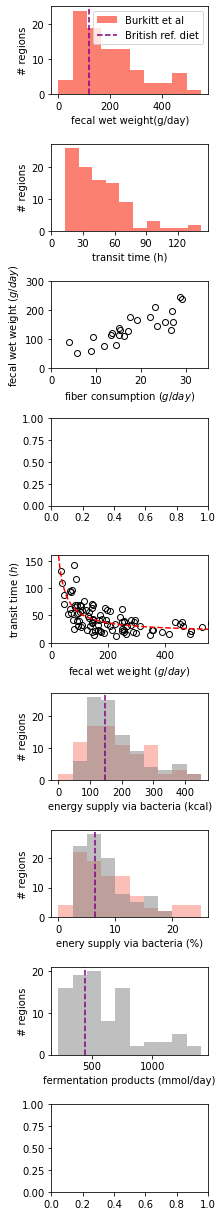

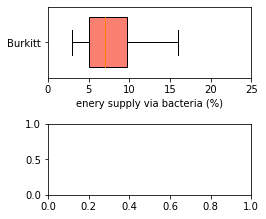

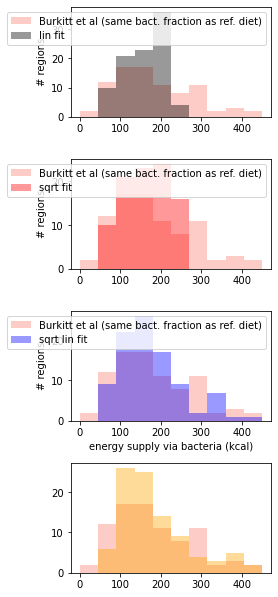

In [28]:


densitychoice=False
ylabelhis="# regions"

#load Burkitt data on fecal wet weight and transit time
Burkittdata=pd.read_csv('data/burkitt_data2.csv')
Burkittdata=Burkittdata.sort_values(by=['transit time'])
display(Burkittdata.head())

#load Cumings et al 1992 on variation in fiber consumption data
CumingsData=pd.read_csv('data/cumings1992_data.csv')
columns=['nonstarch','stoolweight','stoolweight2','ccr']
CumingsData.columns=columns
units=['g/day','g/day','g/day','100k/year age standardized']

#plot different histograms
fig, axs = plt.subplots(9,1, figsize=(3.2,17))

#distribution fecal weight
axs[0].hist(Burkittdata['fecal weight'],density=False,bins=10,label='Burkitt et al',range=(0,550),color=colorBK)
axs[0].axvline(BD_bacwetweight,ls='--',color=colorrefdiet,label='British ref. diet')
axs[0].set_ylabel("# regions")
axs[0].set_xlabel("fecal wet weight(g/day)")
axs[0].legend()

#distribution transit time
axs[1].hist(Burkittdata['transit time'],density=False,bins=10,label='Burkitt et al',color=colorBK)
axs[1].set_ylabel("# regions")
axs[1].set_xlabel("transit time (h)")
axs[1].set_xticks([0,30,60,90,120])
#axs[1].legend()

#plot iber consumption vs stool bulk (Cummings data)
axs[2].set_xlabel("fiber consumption $(g/day)$")
axs[2].set_ylabel("fecal wet weight $(g/day)$")
axs[2].plot(CumingsData['nonstarch'],CumingsData['stoolweight'],color='k',ls='',marker='o',markeredgewidth=1,markeredgecolor='k',markerfacecolor='None',label='Cummings et al.')



#add fits to these correlations
xc=CumingsData['nonstarch']
yc=CumingsData['stoolweight']
fit1=np.polyfit(xc,yc,1)
xc=CumingsData['stoolweight2']/fit1[0]-fit1[1]/fit1[0]
xc=xc[:-1]
yc=CumingsData['ccr'][:-1]
#fit3=np.polyfit(xc,yc,3)
axs[2].set_xlim(0,35)
axs[2].set_ylim(0,300)


###look at transit time vs fecal weight
axs[4].plot(Burkittdata['fecal weight'],Burkittdata['transit time'],ls='',marker='o',markeredgewidth=1,markeredgecolor='k',markerfacecolor='None',label='Burkitt et al')
axs[4].set_xlabel("fecal wet weight $(g/day)$")
axs[4].set_ylabel("transit time $(h)$")
axs[4].set_xlim(0,550)
axs[4].set_ylim(0,160)

#fit non-linear function to data
def func2(x, a, b):
  return a +b/(x)
  #return a * np.log(b * x) + c
xc=Burkittdata['fecal weight']
yc=Burkittdata['transit time']
#print(xc)
#print(yc)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func2, xc, yc)
xcc=np.linspace(0,75,100)
#axs[2].plot(xcc, func(xcc, *popt), color='k', label="Fitted Curve")
#p0 = popt[:2]
popt, pcov = curve_fit(func2, xc, yc,method='trf')
xcc=np.linspace(0,600,200)
axs[4].plot(xcc, func2(xcc, *popt), color='r',ls='--', label="fiber-transit-stool model")
#axs[4].legend()



#previous calculations via estimations o fibers

#use the relation to estimate fiber
#calcfiberfromBurkit=(bdata['fecal weight']-fit1[1])/fit1[0]
#axs[3].hist(calcfiberfromBurkit,density=False,bins=10,label='calc. from Burkitt et al',color=colorBK)
#axs[0].axvline(100,ls='--',color='k',label='ref diet')
#axs[3].set_xlabel("fiber (g/day)")
#axs[3].set_ylabel("# regions")
#axs[3].legend()




#calculate fiber
#perin["carbLI"]=0.75*perin['DR1IFIBE']+0.2*(perin['DR1ICARB']-perin['DR1ISUGR']-perin['DR1IFIBE'])
#carbLIBurkit=calcfiberfromBurkit*0.75+25 #take resistant starch from NHANES data, assume it is not higher
#carbLIBurkit2=2.5*(calcfiberfromBurkit*0.75) #assume resistant starch is always 1.5x higher than fiber
#energyBurkit=energycalc_fromcarbs(carbLIBurkit,0.5)
#energyBurkit2=energycalc_fromcarbs(carbLIBurkit2,0.5)

#energy distribution, based on fecal weight
#energycalc(hadzadiet["carbLI05"],scenario='reference',calctype='from_carbs')


energyBurkitfecalweight,fermBurkittfecalweight=energycalc(dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=0)*0.548,scenario='reference',calctype='from_feces')
energyBurkitfecalweight1,fermBurkittfecalweight1=energycalc(dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=1)*0.548,scenario='reference',calctype='from_feces')
energyBurkitfecalweight2,fermBurkittfecalweight2=energycalc(dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=2)*0.548,scenario='reference',calctype='from_feces')
energyBurkitfecalweight3,fermBurkittfecalweight3=energycalc(dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=3)*0.548,scenario='reference',calctype='from_feces')
energyBurkitfecalweight4,fermBurkittfecalweight4=energycalc(dryweight_fromwetweight(Burkittdata['fecal weight'],calculationmode=4)*0.548,scenario='reference',calctype='from_feces')


#axs[7].hist(energyBurkit,label='calc. from Burkitt et al (RS constant)',color='k',alpha=0.5,range=(0,200))
axs[5].hist(energyBurkitfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=.5,range=(0,450))
axs[5].hist(energyBurkitfecalweight4,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK2,alpha=.5,range=(0,450))



axs[5].axvline(BD_energy_fromcarbs,ls='--',color=colorrefdiet,label='British ref. diet')



#axs[5].hist(energyBurkit2,label='ratio RS/fiber constant',color='r',alpha=0.5)
axs[5].set_xlabel(labelenergybac)
axs[5].set_ylabel("# regions")
#axs[7].set_xlabel("daily energy through bacteria (kcal/day)")
#axs[7].set_ylabel("# regions")


energyratioBurkitfecalweight=energyBurkitfecalweight/BD_energy #assuming fixed rate
#energyratioBurkit2=energyBurkit2/BD_energy #assuming fixed rate
energyratioBurkitfecalweight4=energyBurkitfecalweight4/BD_energy
#axs[8].hist(energyratioBurkit*100,label='via fiber estimation',color='k',alpha=0.5,range=(0,11))
axs[6].hist(energyratioBurkitfecalweight*100,label="same bact. fraction as ref diet)",color=colorBK,alpha=0.5,range=(0,25))
axs[6].hist(energyratioBurkitfecalweight4*100,label="same bact. fraction as ref diet)",color=colorBK2,alpha=0.5,range=(0,25))



axs[6].axvline(BD_energyfrac_fromcarbs*100,ls='--',label='British ref. diet',color=colorrefdiet)
#axs[8].axvline(117.7*energyfecalweightref/BD_energy,ls='--')
#axs[6].hist(energyratioBurkit2*100,label='resist. starch constant',color='r',alpha=0.5)
axs[6].set_xlabel(labelenergybacfrac)
axs[6].set_ylabel("# regions")
#axs[6].legend()
#axs[8].set_xlabel("energy contribution of bacteria (%)")
#axs[8].set_ylabel("# regions")
#axs[8].legend()


#plot fermentation products
#axs[7].hist(fermBurkittfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=0.5)
axs[7].hist(fermBurkittfecalweight4,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK2,alpha=0.5)
axs[7].axvline((BD_ferm_fromfeces+BD_ferm_fromcarbs)/2.,ls='--',color=colorrefdiet,label='British ref. diet')
axs[7].set_xlabel("fermentation products (mmol/day)")
axs[7].set_ylabel("# regions")



fig.tight_layout()
fig.savefig("plot_output/fecalconsiderations_Burkitt.pdf")


#or draw from gaussian distribution
#random.normal(loc=avmouse,scale=avmousestd,size=300)
fig, axs = plt.subplots(2,1, figsize=(3.8,1.5*2.1))

#fig, axs = plt.subplots(2,1, figsize=(3.2,5))

databox=[energyratioBurkitfecalweight4*100]
bplot1=axs[0].boxplot(databox,labels=["Burkitt"],vert=False,showfliers=False, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

colors = [colorBK, 'gray']
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)

#axs[c].legend()
#axs[c].legend(bbox_to_anchor=(0.2, 1))
#axs[c].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_xlim(0,25)
axs[0].set_xlabel(labelenergybacfrac)
#axs[c].set_yticks([0,0.1,0.2])
plt.tight_layout()
plt.savefig("plot_output/energycontribution.pdf")
#savefig("nutrient_distribution.pdf")


fig, axs = plt.subplots(4,1, figsize=(3.8,4*2.1))
#axs=[axs]

#axs[7].hist(energyBurkit,label='calc. from Burkitt et al (RS constant)',color='k',alpha=0.5,range=(0,200))
axs[0].hist(energyBurkitfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=.4,range=(0,450))
axs[0].hist(energyBurkitfecalweight1,color='k',alpha=.4,range=(0,450),label='lin fit')

axs[1].hist(energyBurkitfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=.4,range=(0,450))
axs[1].hist(energyBurkitfecalweight2,color='r',alpha=.4,range=(0,450),label='sqrt fit')

axs[2].hist(energyBurkitfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=.4,range=(0,450))
axs[2].hist(energyBurkitfecalweight3,color='b',alpha=.4,range=(0,450),label='sqrt lin fit')

axs[3].hist(energyBurkitfecalweight,label='Burkitt et al (same bact. fraction as ref. diet)',color=colorBK,alpha=.4,range=(0,450))
axs[3].hist(energyBurkitfecalweight4,color='orange',alpha=.4,range=(0,450),label='sqrt lin fit')



axs[2].set_xlabel(labelenergybac)





axs[0].set_ylabel("# regions")
axs[1].set_ylabel("# regions")
axs[2].set_ylabel("# regions")

axs[0].legend()
axs[1].legend()
axs[2].legend()

#axs[c].set_yticks([0,0.1,0.2])
plt.tight_layout()
plt.savefig("plot_output/energycontribution_burkit_wetweightcontentfit.pdf")
#savefig("nutrient_distribution.pdf")



#plot other models


# Plot distributions into one plot

Hadza mean
1
814.495456619753


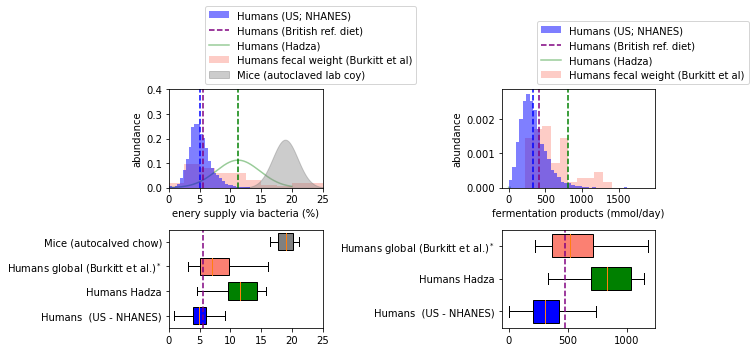

In [27]:
# all in one plot

fig, axs = plt.subplots(2,2, figsize=(2*4.8,2*2.5))

#%%%%%%%%%%%%%%%
#energy distribution
c=0
#start with NHANES data
axs[c,0].hist(perin["energyfracBE"],bins=40,density=True,label='Humans (US; NHANES)',color='b',alpha=0.5)
#axs[c].hist(perin["energyfracEonly"],bins=40,density=True,label='E.rectaly',color='r',alpha=0.5)
#axs[c].hist(perin["energyfracBE05"],bins=40,density=True,label='mix',color='gray',alpha=0.5,zorder=-1)
axs[c,0].set_xlabel(labelenergybacfrac)
axs[c,0].set_ylabel("abundance")
axs[c,0].axvline(perin['energyfracBE'].mean(),ls='--',color=colorNHANES)

#add line reference diet
axs[c,0].axvline(BD_energyfrac_fromfeces*100,ls='--',color=colorrefdiet, label='Humans (British ref. diet)')

#add hadza average

axs[c,0].axvline(hadzadiet_listfiberfraction[0]["energyfracBE075"].mean(),ls='--',color=colorHadza)
#axs[c].axvline(17.6,ls='--',color='k', label='Mouse (autoclaved diet) ')
#axs[c].axvline(20.2,ls='--',color='k', label='Mouse (autoclaved diet) ')






#add gausian to illustrate Hadza
#axs[c].axvspan(4.048716042694848,13.870522981900136,color='green',alpha=0.3,zorder=-2,label='Humans (Hadza)')
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
xrange=np.linspace(0,20,500)
axs[c,0].plot(xrange,gaussian(xrange,hazav,hazstd),color='green',alpha=0.4,zorder=-3,label='Humans (Hadza)')
#axs[c].axvspan(4.048716042694848,13.870522981900136,color='green',alpha=0.3,zorder=-2,label='Humans (Hadza)')
print("Hadza mean")
#print(hadzadiet_listfiberfraction[0])
print(len(hadzadiet_listfiberfraction))
#print(hadzadiet_listfiberfraction[0].mean()['energyfracBE05'])
#print(hadzadiet_listfiberfraction[1].mean()['energyfracBE05'])
#print(hadzadiet_listfiberfraction[2].mean()['energyfracBE05'])

#axs[c,0].fill_between(xrange, gaussian(xrange,hadzadiet_listfiberfraction[0].mean(),hadzadiet_listfiberfraction[0].std()/2), y2=0,color=colorHadza,alpha=0.4,zorder=-3,label='Humans (Hadza)')

#try gaussian of us data
#meanus=perin["energyfracBE"].mean()
#stdus=perin["energyfracBE"].std()
#axs[c].plot(xrange,gaussian(xrange,meanus,stdus),color='blue',alpha=1,zorder=2,label='Humans (US)')

#add Burkitt estimation via fecal weight

axs[c,0].hist(energyratioBurkitfecalweight*100,label="Humans fecal weight (Burkitt et al)",density=True,zorder=-4,color=colorBK,alpha=0.4,range=(0,25))

#axs[6].axvline(,ls='--',label='British ref. diet',color='k')
#axs[8].axvline(117.7*energyfecalweightref/BD_energy,ls='--')

#mous daten
#axs[c].axvspan(17.6,20.2,color='gray',alpha=0.5, label='Mouse (autoclaved lab coy) ')

xrange2=np.linspace(10,30,500)
avmouse=18.9 #average of 17.6 + 20.2
avmousestd=avmouse*0.108 #estimation of variation via variation of fecal weight, assuming energy intake is not changing much
#average fecal weight (4 SFP ice): 0.82 g/day. Variation in mass 0.089. Relative variation: 0.089/0.82=0.108
axs[c,0].fill_between(xrange2, gaussian(xrange2,avmouse,avmousestd), y2=0,color=colorMouse,alpha=0.4,zorder=-3,label='Mice (autoclaved lab coy)')

#finish axes formating
axs[c,0].legend(bbox_to_anchor=(0.2, 1))
#axs[c].yaxis.set_major_formatter(PercentFormatter(1))
axs[c,0].set_xlim(0,25)
axs[c,0].set_yticks([0,0.1,0.2,0.3,0.4])

#%%%%%%%%%%%%%%%
#FP distribution

#start with NHANES data
axs[c,1].hist(perin["fermBE"],bins=40,density=True,label='Humans (US; NHANES)',color='b',alpha=0.5)
#axs[c].hist(perin["energyfracEonly"],bins=40,density=True,label='E.rectaly',color='r',alpha=0.5)
#axs[c].hist(perin["energyfracBE05"],bins=40,density=True,label='mix',color='gray',alpha=0.5,zorder=-1)
axs[c,1].set_xlabel("fermentation products (mmol/day)")
axs[c,1].set_ylabel("abundance")
axs[c,1].axvline(perin['fermBE'].mean(),ls='--',color=colorNHANES)

#add line reference diet
axs[c,1].axvline(BD_ferm_fromfeces,ls='--',color=colorrefdiet, label='Humans (British ref. diet)')

#add hadza average

axs[c,1].axvline(hadzadiet_listfiberfraction[0]["fermentationprodBE075"].mean(),ls='--',color=colorHadza)
#axs[c].axvline(17.6,ls='--',color='k', label='Mouse (autoclaved diet) ')
#axs[c].axvline(20.2,ls='--',color='k', label='Mouse (autoclaved diet) ')




#add gausian to illustrate Hadza
#axs[c].axvspan(4.048716042694848,13.870522981900136,color='green',alpha=0.3,zorder=-2,label='Humans (Hadza)')
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
xrange=np.linspace(0,20,500)


hazavFP=hadzadiet_listfiberfraction[0]["fermentationprodBE075"].mean()
hazstdFP=hadzadiet_listfiberfraction[0]["fermentationprodBE075"].std()
print(hazavFP)

    
axs[c,1].plot(xrange,gaussian(xrange,hazavFP,hazstdFP),color='green',alpha=0.4,zorder=-3,label='Humans (Hadza)')
#axs[c].axvspan(4.048716042694848,13.870522981900136,color='green',alpha=0.3,zorder=-2,label='Humans (Hadza)')
#print("Hadza mean FP")
#print(hadzadiet_listfiberfraction[0])
#print(len(hadzadiet_listfiberfraction))
#print(hadzadiet_listfiberfraction[0].mean()['energyfracBE05'])
#print(hadzadiet_listfiberfraction[1].mean()['energyfracBE05'])
#print(hadzadiet_listfiberfraction[2].mean()['energyfracBE05'])

#axs[c].fill_between(xrange, gaussian(xrange,hadzadiet_listfiberfraction[0].mean(),hadzadiet_listfiberfraction[0].std()/2), y2=0,color=colorHadza,alpha=0.4,zorder=-3,label='Humans (Hadza)')

#try gaussian of us data
#meanus=perin["energyfracBE"].mean()
#stdus=perin["energyfracBE"].std()
#axs[c].plot(xrange,gaussian(xrange,meanus,stdus),color='blue',alpha=1,zorder=2,label='Humans (US)')

#add Burkitt estimation via fecal weight
####add histogram....
axs[c,1].hist(fermBurkittfecalweight4,label="Humans fecal weight (Burkitt et al)",density=True,zorder=-4,color=colorBK,alpha=0.4)

#mous daten
#axs[c].axvspan(17.6,20.2,color='gray',alpha=0.5, label='Mouse (autoclaved lab coy) ')

xrange2=np.linspace(10,30,500)
avmouse=18.9 #average of 17.6 + 20.2
avmousestd=avmouse*0.108 #estimation of variation via variation of fecal weight, assuming energy intake is not changing much
#average fecal weight (4 SFP ice): 0.82 g/day. Variation in mass 0.089. Relative variation: 0.089/0.82=0.108
#axs[c,1].fill_between(xrange2, gaussian(xrange2,avmouse,avmousestd), y2=0,color=colorMouse,alpha=0.4,zorder=-3,label='Mice (autoclaved lab coy)')

#finish axes formating
axs[c,1].legend(bbox_to_anchor=(0.2, 1))
#axs[c].yaxis.set_major_formatter(PercentFormatter(1))
#axs[c,1].set_xlim(0,25)
#axs[c,1].set_yticks([0,0.1,0.2,0.3,0.4])



######################
#plotbox diagrams
######################

#US
c=1

#plot histogram of energy contribution
#axs[c].hist(,bins=40,density=True,label='Humans (US; NHANES)',color='b',alpha=0.5)
#axs[c].hist(perin["energyfracEonly"],bins=40,density=True,label='E.rectaly',color='r',alpha=0.5)
#axs[c].hist(perin["energyfracBE"],bins=40,density=True,label='mix',color='gray',alpha=0.5,zorder=-1)
#axs[c].set_xlabel("energy contribution bacteria (%)")
#axs[c].set_ylabel("probability")

#HANSA

#axs[c].boxplot(hadzadiet["energyfracBE"],label='Humans (Hadza)',color='green',alpha=0.5)
#axs[c].axvline(17.6,ls='--',color='k', label='Mouse (autoclaved diet) ')
#axs[c].axvline(20.2,ls='--',color='k', label='Mouse (autoclaved diet) ')

#axs[c].axvspan(4.048716042694848,13.870522981900136,color='green',alpha=0.3,zorder=-2,label='Humans (Hadza)')
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
xrange=np.linspace(0,20,500)
#axs[c].plot(xrange,gaussian(xrange,hazav,hazstd),color='green',alpha=0.4,zorder=-3,label='Humans (Hadza)')
#axs[c].axvspan(4.048716042694848,13.870522981900136,color='green',alpha=0.3,zorder=-2,label='Humans (Hadza)')
#axs[c].fill_between(xrange, gaussian(xrange,hazav,hazstd/2), y2=0,color='green',alpha=0.4,zorder=-3,label='Humans (Hadza)')

#xrange
xrange2=np.linspace(10,30,500)
avmouse=18.9 #average of 17.6 + 20.2
avmousestd=avmouse*0.108 #estimation of variation via variation of fecal weight, assuming energy intake is not changing much
#average fecal weight (4 SFP ice): 0.82 g/day. Variation in mass 0.089. Relative variation: 0.089/0.82=0.108
#axs[c].fill_between(xrange2, gaussian(xrange2,avmouse,avmousestd), y2=0,color='gray',alpha=0.4,zorder=-3,label='Mice (autoclaved lab coy)')

#mouse points, take 4 different fecal weights and calculate difference to average

datamouse=np.array([0.871165644,1.055214724,1.116564417,0.957055215])*avmouse

#or draw from gaussian distribution
#random.normal(loc=avmouse,scale=avmousestd,size=300)


#bplot1=axs[0].boxplot(databox,labels=["Burkitt"],vert=False,showfliers=False, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

bplot1=axs[c,0].boxplot([perin["energyfracBE"],hadzadiet_listfiberfraction[0]["energyfracBE075"],energyratioBurkitfecalweight4*100,datamouse],patch_artist=True,labels=["Humans  (US - NHANES)","Humans Hadza","Humans global (Burkitt et al.)$^*$","Mice (autocalved chow)"],vert=False,showfliers=False, widths=[0.7]*4)#,"Mice (autoclaved lab coy)"])
                
axs[c,0].axvline(BD_energyfrac_fromfeces*100,ls='--',color=colorrefdiet, label='Humans (British ref. diet)')


    
# fill with colors
colors = [colorNHANES, colorHadza, colorBK,colorMouse]

for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)

#axs[c].legend()
#axs[c].legend(bbox_to_anchor=(0.2, 1))
#axs[c].yaxis.set_major_formatter(PercentFormatter(1))
axs[c,0].set_xlim(0,25)

#plot box diagrams

#US


#plot histogram of energy contribution
#axs[c].hist(,bins=40,density=True,label='Humans (US; NHANES)',color='b',alpha=0.5)
#axs[c].hist(perin["energyfracEonly"],bins=40,density=True,label='E.rectaly',color='r',alpha=0.5)
#axs[c].hist(perin["energyfracBE"],bins=40,density=True,label='mix',color='gray',alpha=0.5,zorder=-1)
#axs[c].set_xlabel("energy contribution bacteria (%)")
#axs[c].set_ylabel("probability")

#HANSA

#axs[c].boxplot(hadzadiet["energyfracBE"],label='Humans (Hadza)',color='green',alpha=0.5)

#axs[c].axvline(17.6,ls='--',color='k', label='Mouse (autoclaved diet) ')
#axs[c].axvline(20.2,ls='--',color='k', label='Mouse (autoclaved diet) ')

#axs[c].axvspan(4.048716042694848,13.870522981900136,color='green',alpha=0.3,zorder=-2,label='Humans (Hadza)')
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)
xrange=np.linspace(0,20,500)
#axs[c].plot(xrange,gaussian(xrange,hazav,hazstd),color='green',alpha=0.4,zorder=-3,label='Humans (Hadza)')
#axs[c].axvspan(4.048716042694848,13.870522981900136,color='green',alpha=0.3,zorder=-2,label='Humans (Hadza)')
#axs[c].fill_between(xrange, gaussian(xrange,hazav,hazstd/2), y2=0,color='green',alpha=0.4,zorder=-3,label='Humans (Hadza)')

#xrange
xrange2=np.linspace(10,30,500)
avmouse=18.9 #average of 17.6 + 20.2
avmousestd=avmouse*0.108 #estimation of variation via variation of fecal weight, assuming energy intake is not changing much
#average fecal weight (4 SFP ice): 0.82 g/day. Variation in mass 0.089. Relative variation: 0.089/0.82=0.108
#axs[c].fill_between(xrange2, gaussian(xrange2,avmouse,avmousestd), y2=0,color='gray',alpha=0.4,zorder=-3,label='Mice (autoclaved lab coy)')

#mouse points, take 4 different fecal weights and calculate difference to average

datamouse=np.array([0.871165644,1.055214724,1.116564417,0.957055215])*avmouse

#or draw from gaussian distribution
#random.normal(loc=avmouse,scale=avmousestd,size=300)

#bplot1=axs[0].boxplot(databox,labels=["Burkitt"],vert=False,showfliers=False, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
bplot1=axs[c,1].boxplot([perin["fermBE"],hadzadiet_listfiberfraction[0]["fermentationprodBE075"],fermBurkittfecalweight4],patch_artist=True,labels=["Humans  (US - NHANES)","Humans Hadza","Humans global (Burkitt et al.)$^*$"],vert=False,showfliers=False, widths=[0.7]*3)#,"Mice (autoclaved lab coy)"])
                
axs[c,1].axvline(BD_ferm_fromcarbs,ls='--',color=colorrefdiet, label='Humans (British ref. diet)')
    
# fill with colors
colors = [colorNHANES, colorHadza, colorBK,colorMouse]
for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)

#axs[c].legend()
#axs[c].legend(bbox_to_anchor=(0.2, 1))
#axs[c].yaxis.set_major_formatter(PercentFormatter(1))
#axs[c,1].set_xlim(0,25)
#axs[c].set_yticks([0,0.1,0.2])
plt.tight_layout()
plt.savefig("energycontribution_summary.pdf")
#savefig("nutrient_distribution.pdf")

In [ ]:
$